In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
updf = pd.read_csv('urban-15-1000.csv', header=0)
uodf = pd.read_csv('urban-5-500.csv', header=0)
rdf = pd.read_csv('rural-5-500.csv', header=0)
updf_wknn = pd.read_csv('urban-15-1000-wknn.csv', header=0)
uodf_wknn = pd.read_csv('urban-5-500-wknn.csv', header=0)
rdf_wknn = pd.read_csv('rural-5-500-wknn.csv', header=0)

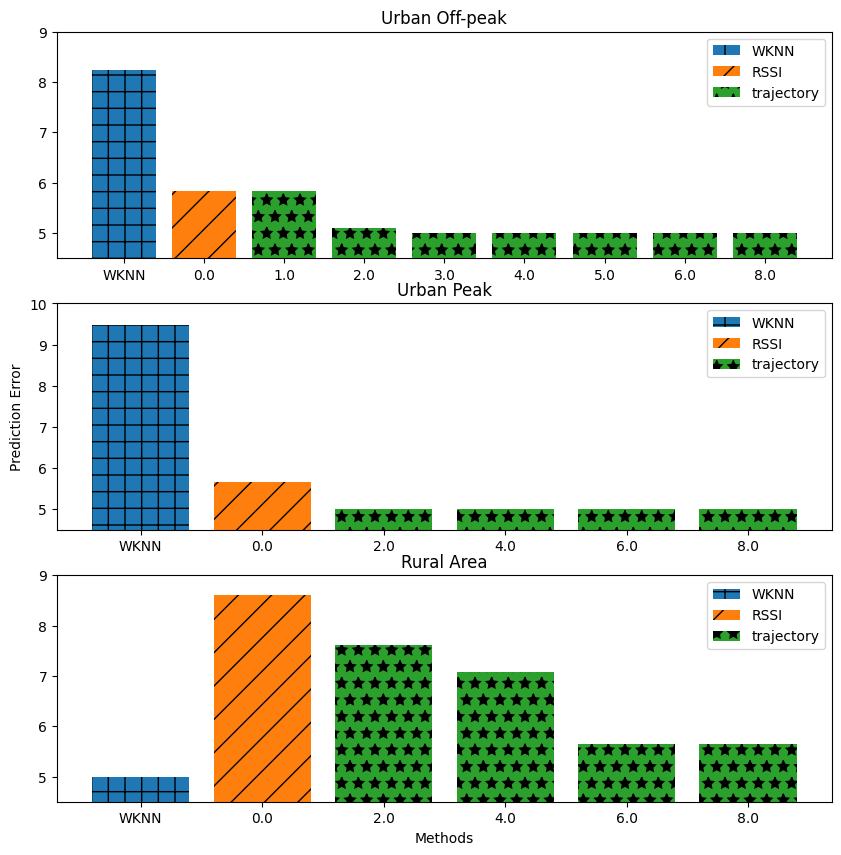

In [23]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
n0 = uodf.query('dx==100 and top_k==30 and time_gap==3')[['n_step','median']].set_index('n_step').to_dict(orient='dict')['median']
# n0 =  [[k,-(v-n0[0])/n0[0]*100] for k,v in n0.items() if k in n0]
n0 =  [[k,v] for k,v in n0.items() if k in n0]
n0.append([-1, uodf_wknn.query('dx==100')['median'].values[0]])
n0 = np.array(sorted(n0, key=lambda x:x[0]))
xtics = ['WKNN']+list([str(i) for i in n0[1:,0]])
colors = ['tab:blue', 'tab:orange']+ ['tab:green']*7
labels = ['WKNN','RSSI','trajectory']+ ['_trajectory']*6
ax[0].set_ylim([4.5,9])
ax[0].bar( xtics, n0[:,1]  ,color=colors, label=labels, hatch=['+','/','*','*','*','*','*','*','*'])
ax[0].legend()
ax[0].set_title('Urban Off-peak')

n0 = updf.query('dx==100 and top_k==30 and time_gap==3')[['n_step','median']].set_index('n_step').to_dict(orient='dict')['median']
n0 =  [[k,v] for k,v in n0.items() if k in n0]
n0.append([-1, updf_wknn.query('dx==100')['median'].values[0]])
n0 = np.array(sorted(n0, key=lambda x:x[0]))
xtics = ['WKNN']+list([str(i) for i in n0[1:,0]])
colors = ['tab:blue', 'tab:orange']+ ['tab:green']* (len(n0)-2)
labels = ['WKNN','RSSI','trajectory']+ ['_trajectory']*(len(n0)-3)
ax[1].set_ylim([4.5,10])
ax[1].bar(xtics, n0[:,1], color=colors, label=labels, hatch=['+','/','*','*','*','*'])
ax[1].legend()
ax[1].set_title('Urban Peak')

n0 = rdf.query('dx==100 and top_k==30 and time_gap==3')[['n_step','median']].set_index('n_step').to_dict(orient='dict')['median']
n0 =  [[k,v] for k,v in n0.items() if k in n0]
n0.append([-1, rdf_wknn.query('dx==100')['median'].values[0]])
n0 = np.array(sorted(n0, key=lambda x:x[0]))
xtics = ['WKNN']+list([str(i) for i in n0[1:,0]])
colors = ['tab:blue', 'tab:orange']+ ['tab:green']* (len(n0)-2)
labels = ['WKNN','RSSI','trajectory']+ ['_trajectory']*(len(n0)-3)
ax[2].set_ylim([4.5,9])
ax[2].bar(xtics, n0[:,1], color=colors, label=labels, hatch=['+','/','*','*','*','*'])
ax[2].legend()
ax[2].set_title('Rural Area')

ax[2].set_xlabel('Methods')
ax[1].set_ylabel('Prediction Error')
plt.savefig('nstep-accu.pdf',dpi=1000)

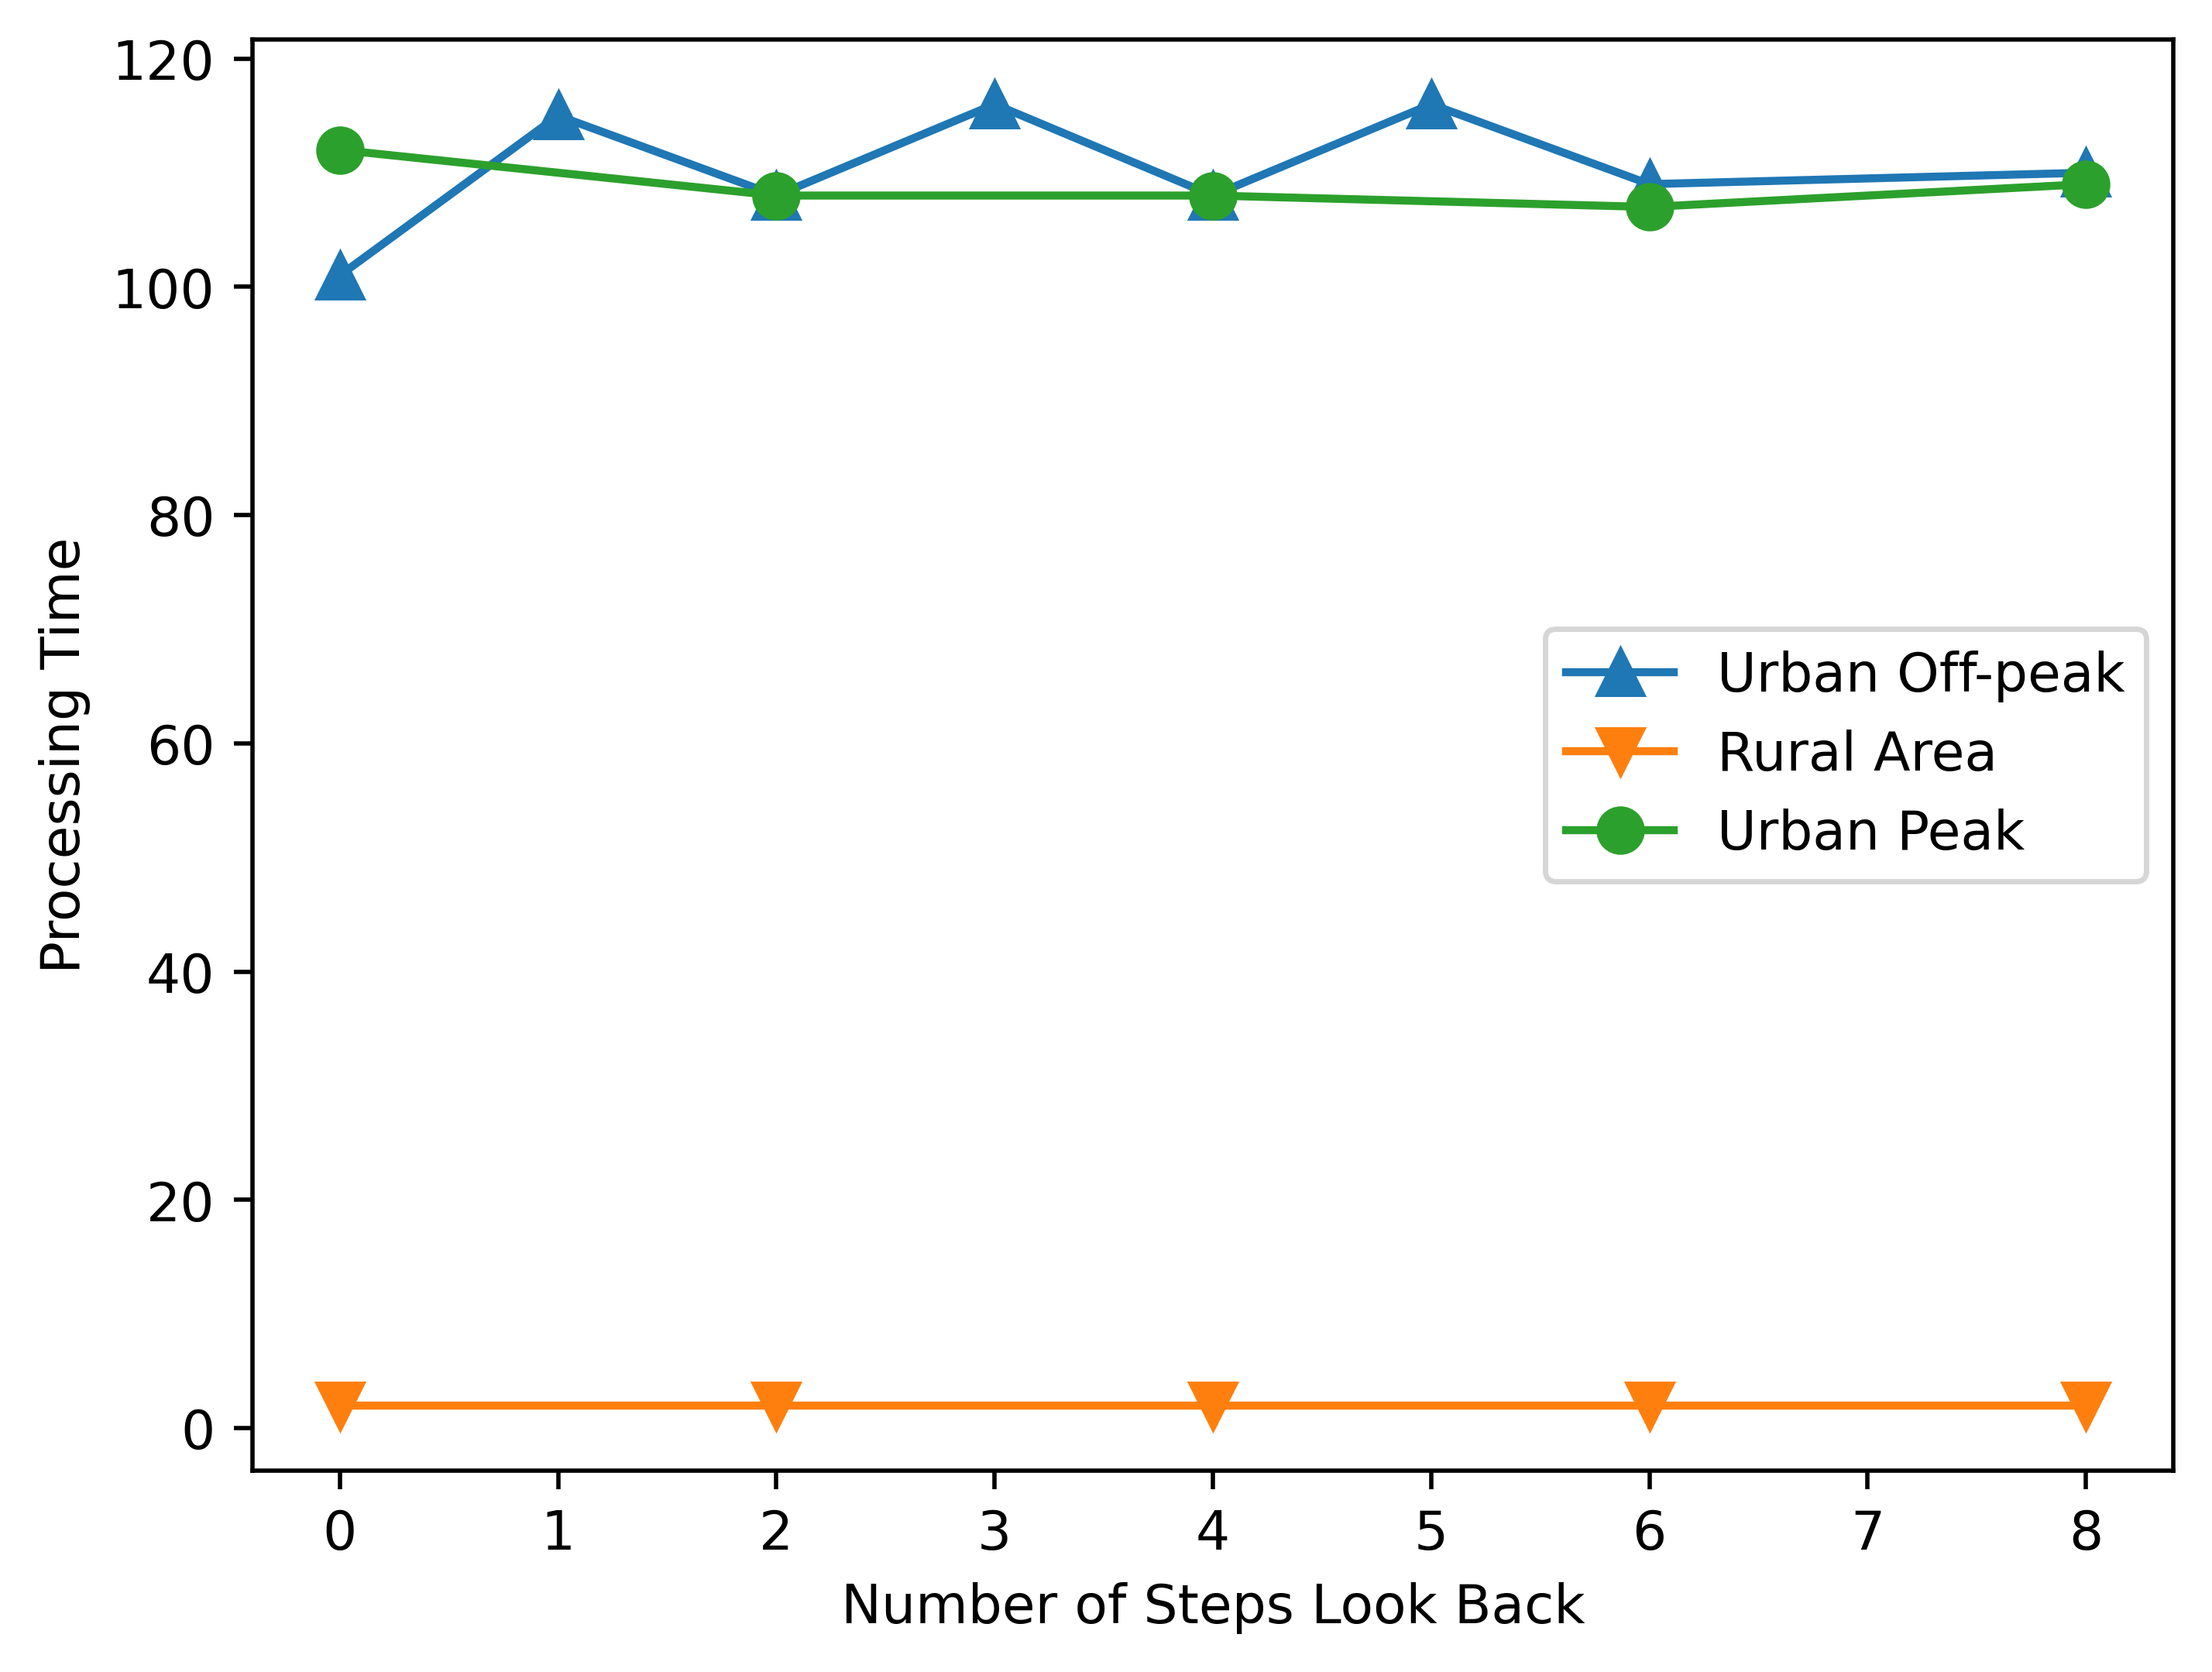

In [37]:
fig, ax = plt.subplots(1,1 )

fig.set_dpi(500)
n0 = uodf.query('dx==100 and top_k==30 and time_gap==3')[['n_step','t0']].set_index('n_step').to_dict(orient='dict')['t0']
n0 =  [[k,v] for k,v in n0.items() if k in n0]
n0 = np.array(sorted(n0, key=lambda x:x[0]))
ax.plot(n0[:,0], n0[:,1], marker='^',  markersize=8, label='Urban Off-peak')

n0 = rdf.query('dx==100 and top_k==30 and time_gap==3')[['n_step','t0']].set_index('n_step').to_dict(orient='dict')['t0']
n0 =  [[k,v] for k,v in n0.items() if k in n0]
n0 = np.array(sorted(n0, key=lambda x:x[0]))
ax.plot(n0[:,0], n0[:,1], marker='v',markersize=8, label='Rural Area')


n0 = updf.query('dx==100 and top_k==30 and time_gap==3')[['n_step','t0']].set_index('n_step').to_dict(orient='dict')['t0']
n0 =  [[k,v] for k,v in n0.items() if k in n0]
n0 = np.array(sorted(n0, key=lambda x:x[0]))
ax.plot(n0[:,0], n0[:,1], marker='o',markersize=8, label='Urban Peak')


# ax.plot(rdf.query('dx==100 and top_k==30 and time_gap==3')['n_step'],rdf.query('dx==100 and top_k==30 and time_gap==3')['t0'], marker='v', label='Rural Area')
# ax.plot(uodf.query('dx==100 and top_k==30 and time_gap==3')['n_step'],uodf.query('dx==100 and top_k==30 and time_gap==3')['t0'], marker='^', label='Urban Off-peak')
# ax.plot(updf.query('dx==100 and top_k==30 and time_gap==3')['n_step'],updf.query('dx==100 and top_k==30 and time_gap==3')['t0'], marker='o', label='Urban Peak')

ax.set_xlabel('Number of Steps Look Back')
ax.set_ylabel('Processing Time')
ax.legend()
plt.savefig('nstep-time.pdf',dpi=500)

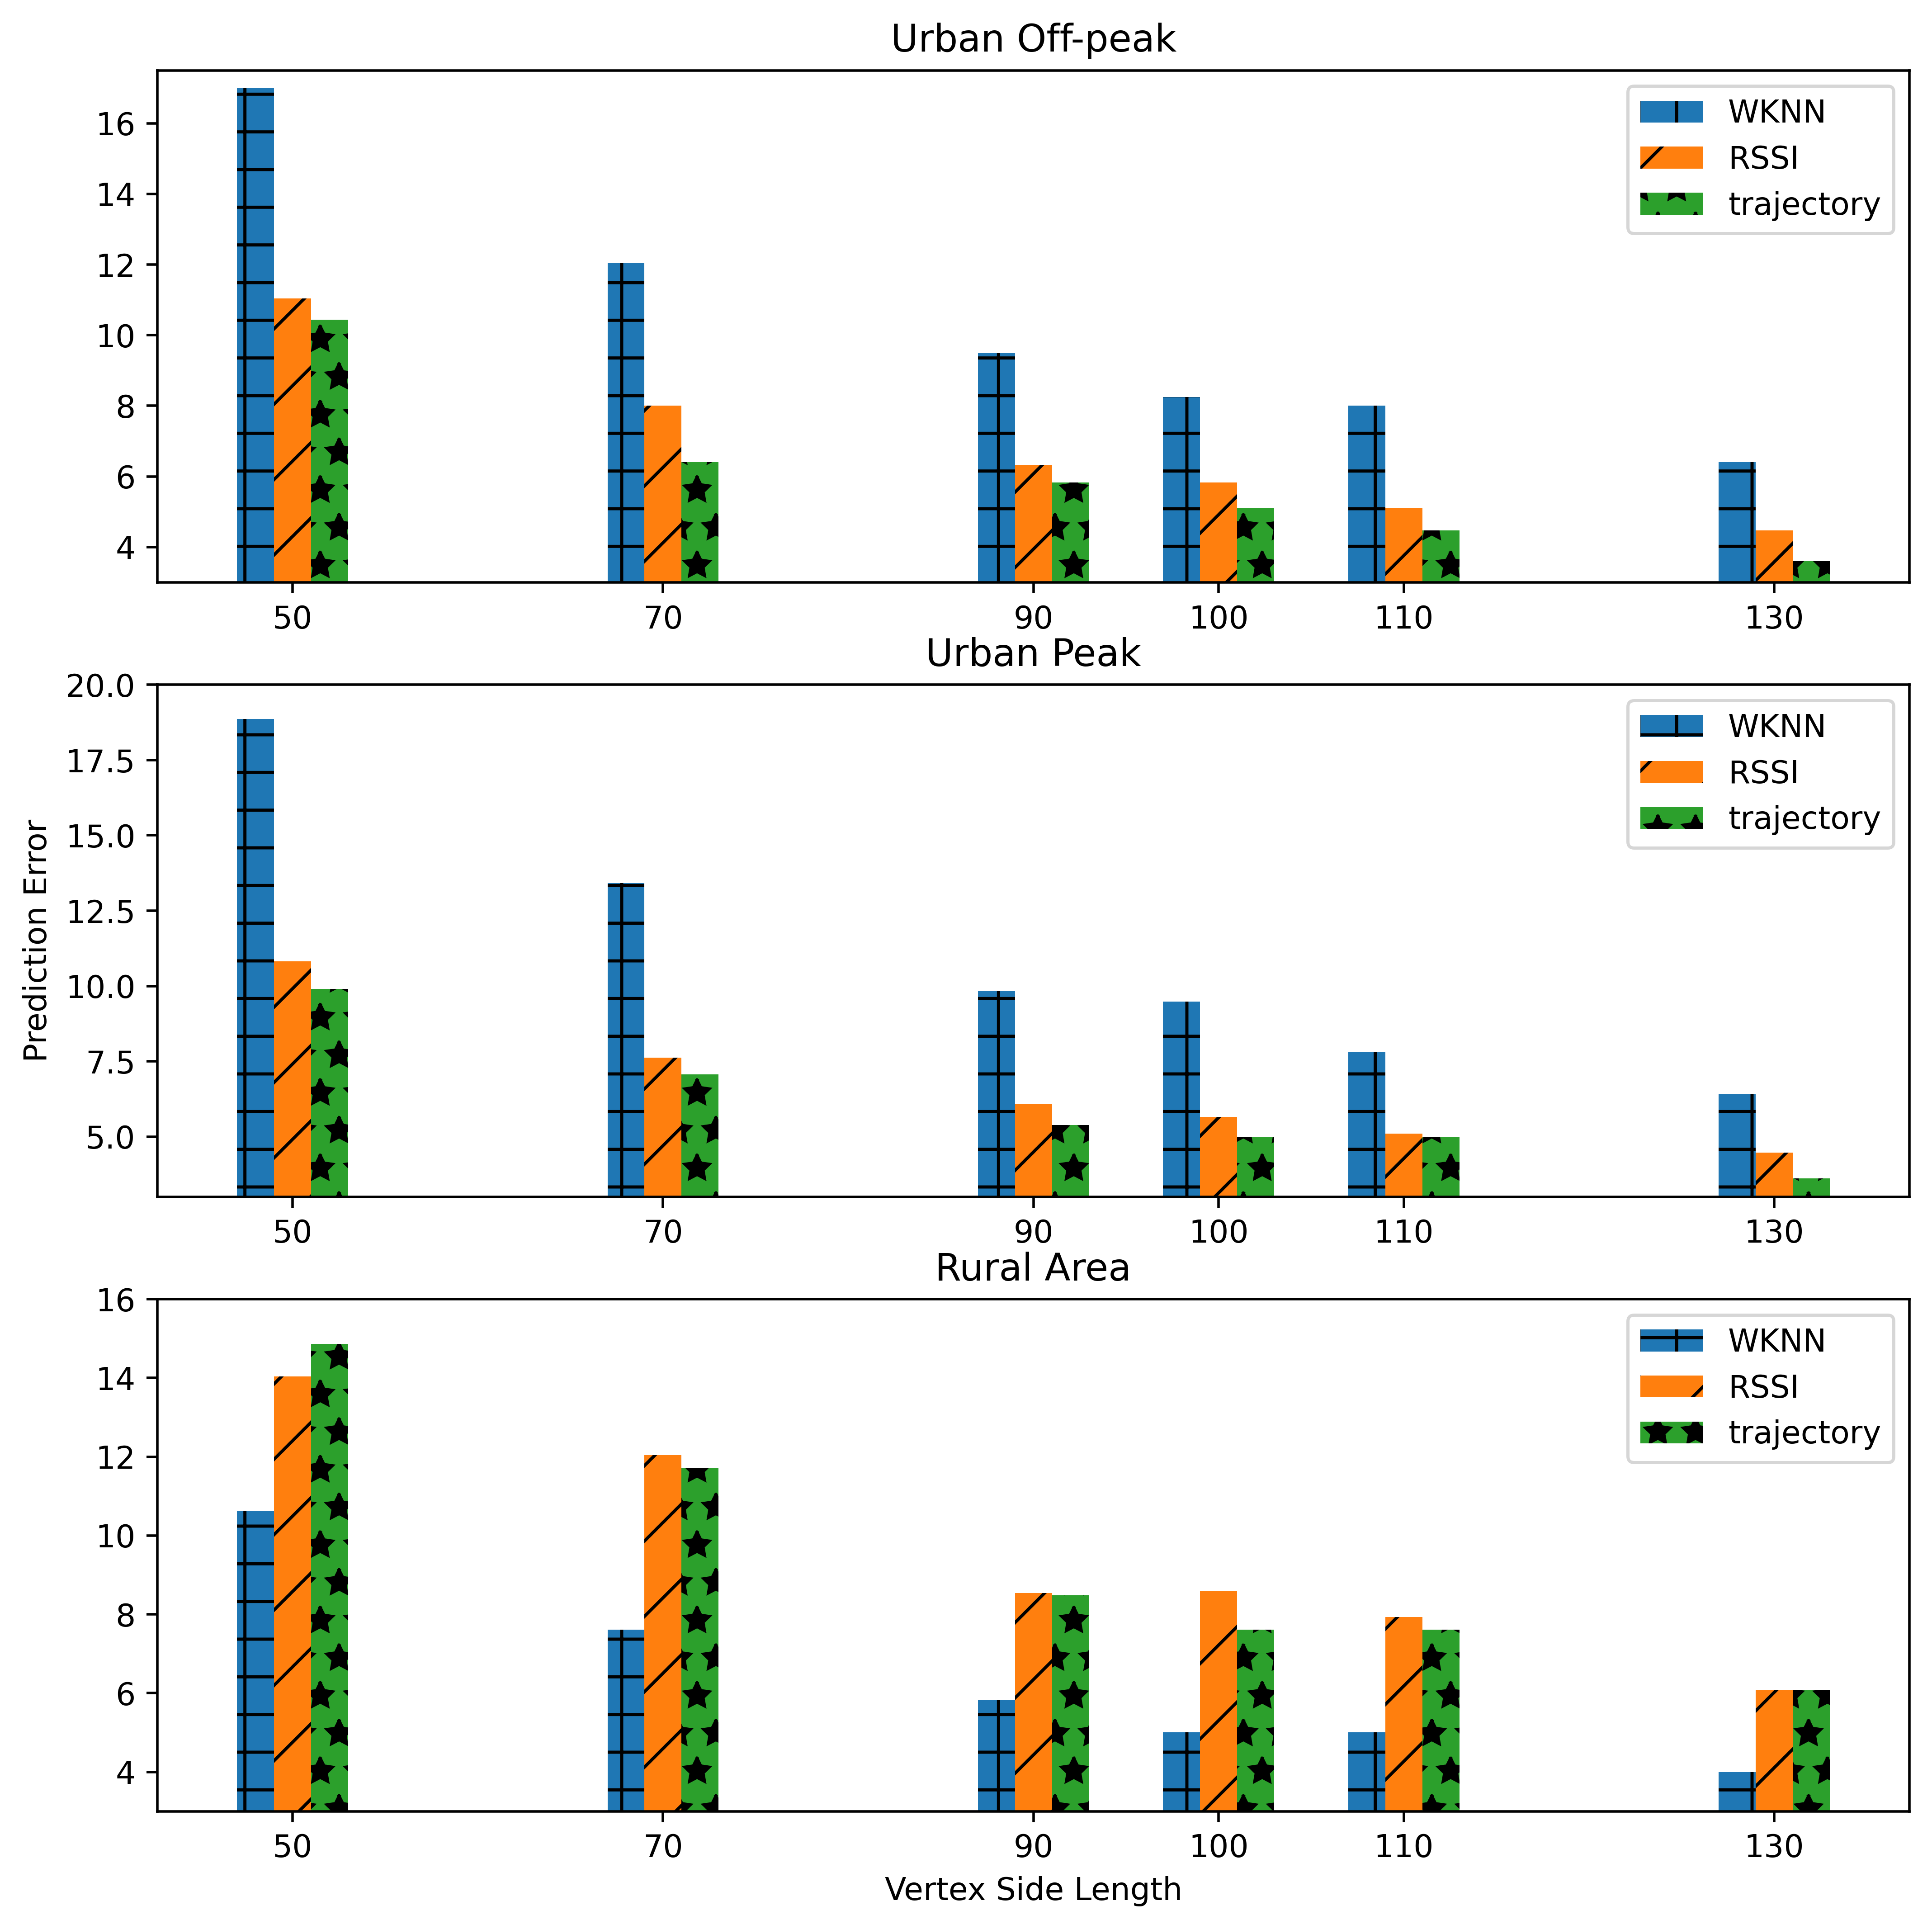

In [40]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
fig.set_dpi(500)
n0 = uodf.query('n_step==2 and top_k==30 and time_gap==3')[['dx','median']].set_index('dx').to_dict(orient='dict')['median']
n1 = uodf.query('n_step==0 and top_k==30 and time_gap==3')[['dx','median']].set_index('dx').to_dict(orient='dict')['median']
n2 = uodf_wknn.loc[:,['dx','median']].set_index('dx').to_dict(orient='dict')['median']
n2 = [[k,v] for k,v in n2.items() if k in n0]
n1 = [[k,v] for k,v in n1.items() if k in n0]
n2 = np.array(sorted(n2, key=lambda x:x[0]))
n1 = np.array(sorted(n1, key=lambda x:x[0]))
n0 =  np.array([[k,v] for k,v in n0.items() if k in n0])
n0 =  np.array(sorted(n0, key=lambda x:x[0]))
ax[0].bar(n2[:,0]-2, n2[:,1], label='WKNN', color='tab:blue', width=2, hatch=['+'])
ax[0].bar(n1[:,0], n1[:,1], label='RSSI', color='tab:orange', width=2, hatch=['/'])
ax[0].bar(n0[:,0]+2, n0[:,1], label='trajectory', color='tab:green', width=2, hatch=['*'])
ax[0].set_ylim([3,17.5])
ax[0].set_xticks([50,70,90,100,110,130])
ax[0].legend()
ax[0].set_title('Urban Off-peak')


n0 = updf.query('n_step==2 and top_k==30 and time_gap==3')[['dx','median']].set_index('dx').to_dict(orient='dict')['median']
n1 = updf.query('n_step==0 and top_k==30 and time_gap==3')[['dx','median']].set_index('dx').to_dict(orient='dict')['median']
n2 = updf_wknn.loc[:,['dx','median']].set_index('dx').to_dict(orient='dict')['median']
n2 = [[k,v] for k,v in n2.items() if k in n0]
n1 = [[k,v] for k,v in n1.items() if k in n0]
n2 = np.array(sorted(n2, key=lambda x:x[0]))
n1 = np.array(sorted(n1, key=lambda x:x[0]))
n0 =  np.array([[k,v] for k,v in n0.items() if k in n0])
n0 =  np.array(sorted(n0, key=lambda x:x[0]))
ax[1].bar(n2[:,0]-2, n2[:,1], label='WKNN', color='tab:blue', width=2, hatch=['+'])
ax[1].bar(n1[:,0], n1[:,1], label='RSSI', color='tab:orange', width=2, hatch=['/'])
ax[1].bar(n0[:,0]+2, n0[:,1], label='trajectory', color='tab:green', width=2, hatch=['*'])
ax[1].set_ylim([3,20])
ax[1].set_xticks([50,70,90,100,110,130])
ax[1].legend()
ax[1].set_title('Urban Peak')


n0 = rdf.query('n_step==2 and top_k==30 and time_gap==3')[['dx','median']].set_index('dx').to_dict(orient='dict')['median']
n1 = rdf.query('n_step==0 and top_k==30 and time_gap==3')[['dx','median']].set_index('dx').to_dict(orient='dict')['median']
n2 = rdf_wknn.loc[:,['dx','median']].set_index('dx').to_dict(orient='dict')['median']
n2 = [[k,v] for k,v in n2.items() if k in n0]
n1 = [[k,v] for k,v in n1.items() if k in n0]
n2 = np.array(sorted(n2, key=lambda x:x[0]))
n1 = np.array(sorted(n1, key=lambda x:x[0]))
n0 =  np.array([[k,v] for k,v in n0.items() if k in n0])
n0 =  np.array(sorted(n0, key=lambda x:x[0]))
ax[2].bar(n2[:,0]-2, n2[:,1], label='WKNN', color='tab:blue', width=2, hatch=['+'])
ax[2].bar(n1[:,0], n1[:,1], label='RSSI', color='tab:orange', width=2, hatch=['/'])
ax[2].bar(n0[:,0]+2, n0[:,1], label='trajectory', color='tab:green', width=2, hatch=['*'])
ax[2].set_ylim([3,16])
ax[2].set_xticks([50,70,90,100,110,130])
ax[2].legend()
ax[2].set_title('Rural Area')

ax[2].set_xlabel('Vertex Side Length')
ax[1].set_ylabel('Prediction Error')
plt.savefig('r-accu.pdf',dpi=1000)

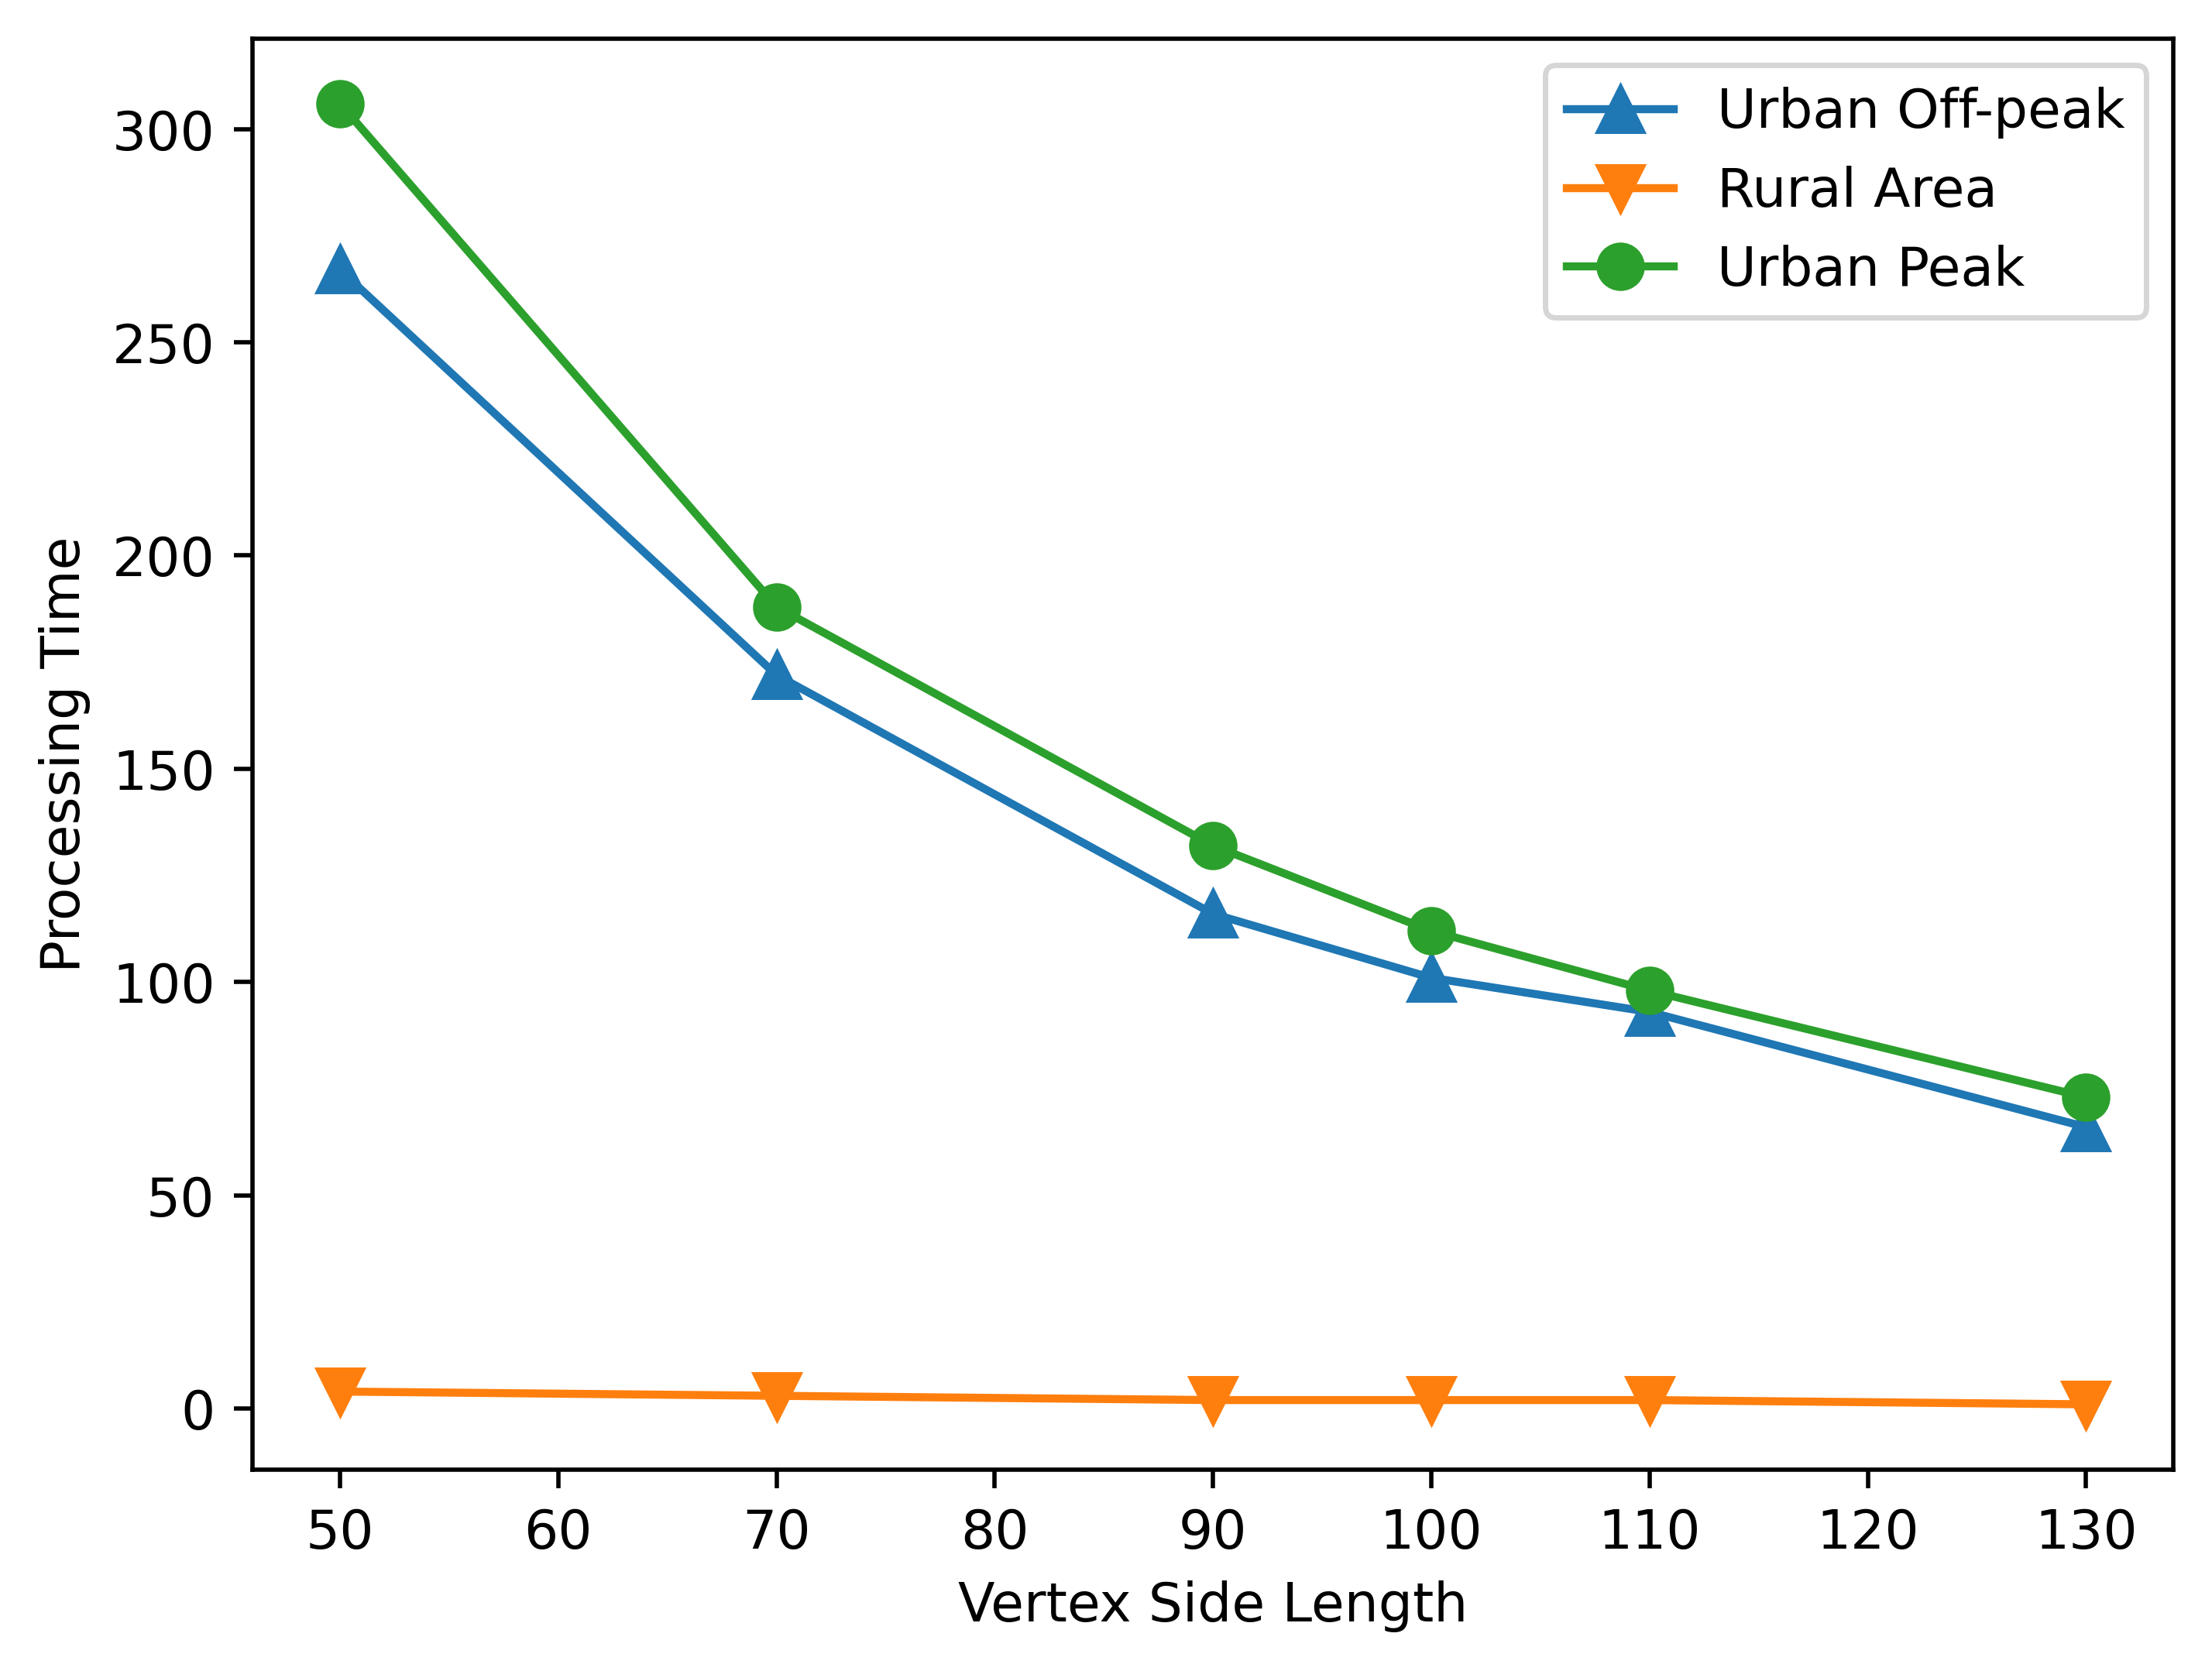

In [43]:

fig, ax = plt.subplots(1,1)
fig.set_dpi(500)
n0 = uodf.query('n_step==0 and top_k==30 and time_gap==3')[['dx','t0']].set_index('dx').to_dict(orient='dict')['t0']
n2 = uodf.query('n_step==2 and top_k==30 and time_gap==3')[['dx','t0']].set_index('dx').to_dict(orient='dict')['t0']
n2 =  [[k,v] for k,v in n0.items() if k in n2]
n2 = np.array(sorted(n2, key=lambda x:x[0]))
ax.plot(n2[:,0], n2[:,1],  marker='^',markersize=8, label='Urban Off-peak')

n0 = rdf.query('n_step==0 and top_k==30 and time_gap==3')[['dx','t0']].set_index('dx').to_dict(orient='dict')['t0']
n2 = rdf.query('n_step==2 and top_k==30 and time_gap==3')[['dx','t0']].set_index('dx').to_dict(orient='dict')['t0']
n2 =  [[k,v] for k,v in n0.items() if k in n2]
n2 = np.array(sorted(n2, key=lambda x:x[0]))
ax.plot(n2[:,0], n2[:,1], marker='v',markersize=8, label='Rural Area')

n0 = updf.query('n_step==0 and top_k==30 and time_gap==3')[['dx','t0']].set_index('dx').to_dict(orient='dict')['t0']
n2 = updf.query('n_step==2 and top_k==30 and time_gap==3')[['dx','t0']].set_index('dx').to_dict(orient='dict')['t0']
n2 =  [[k,v] for k,v in n0.items() if k in n2]
n2 = np.array(sorted(n2, key=lambda x:x[0]))
ax.plot(n2[:,0], n2[:,1], marker='o', markersize=8,label='Urban Peak')

ax.set_ylabel('Processing Time')
ax.set_xlabel('Vertex Side Length')
ax.legend()
plt.savefig('r-time.pdf',dpi=500)

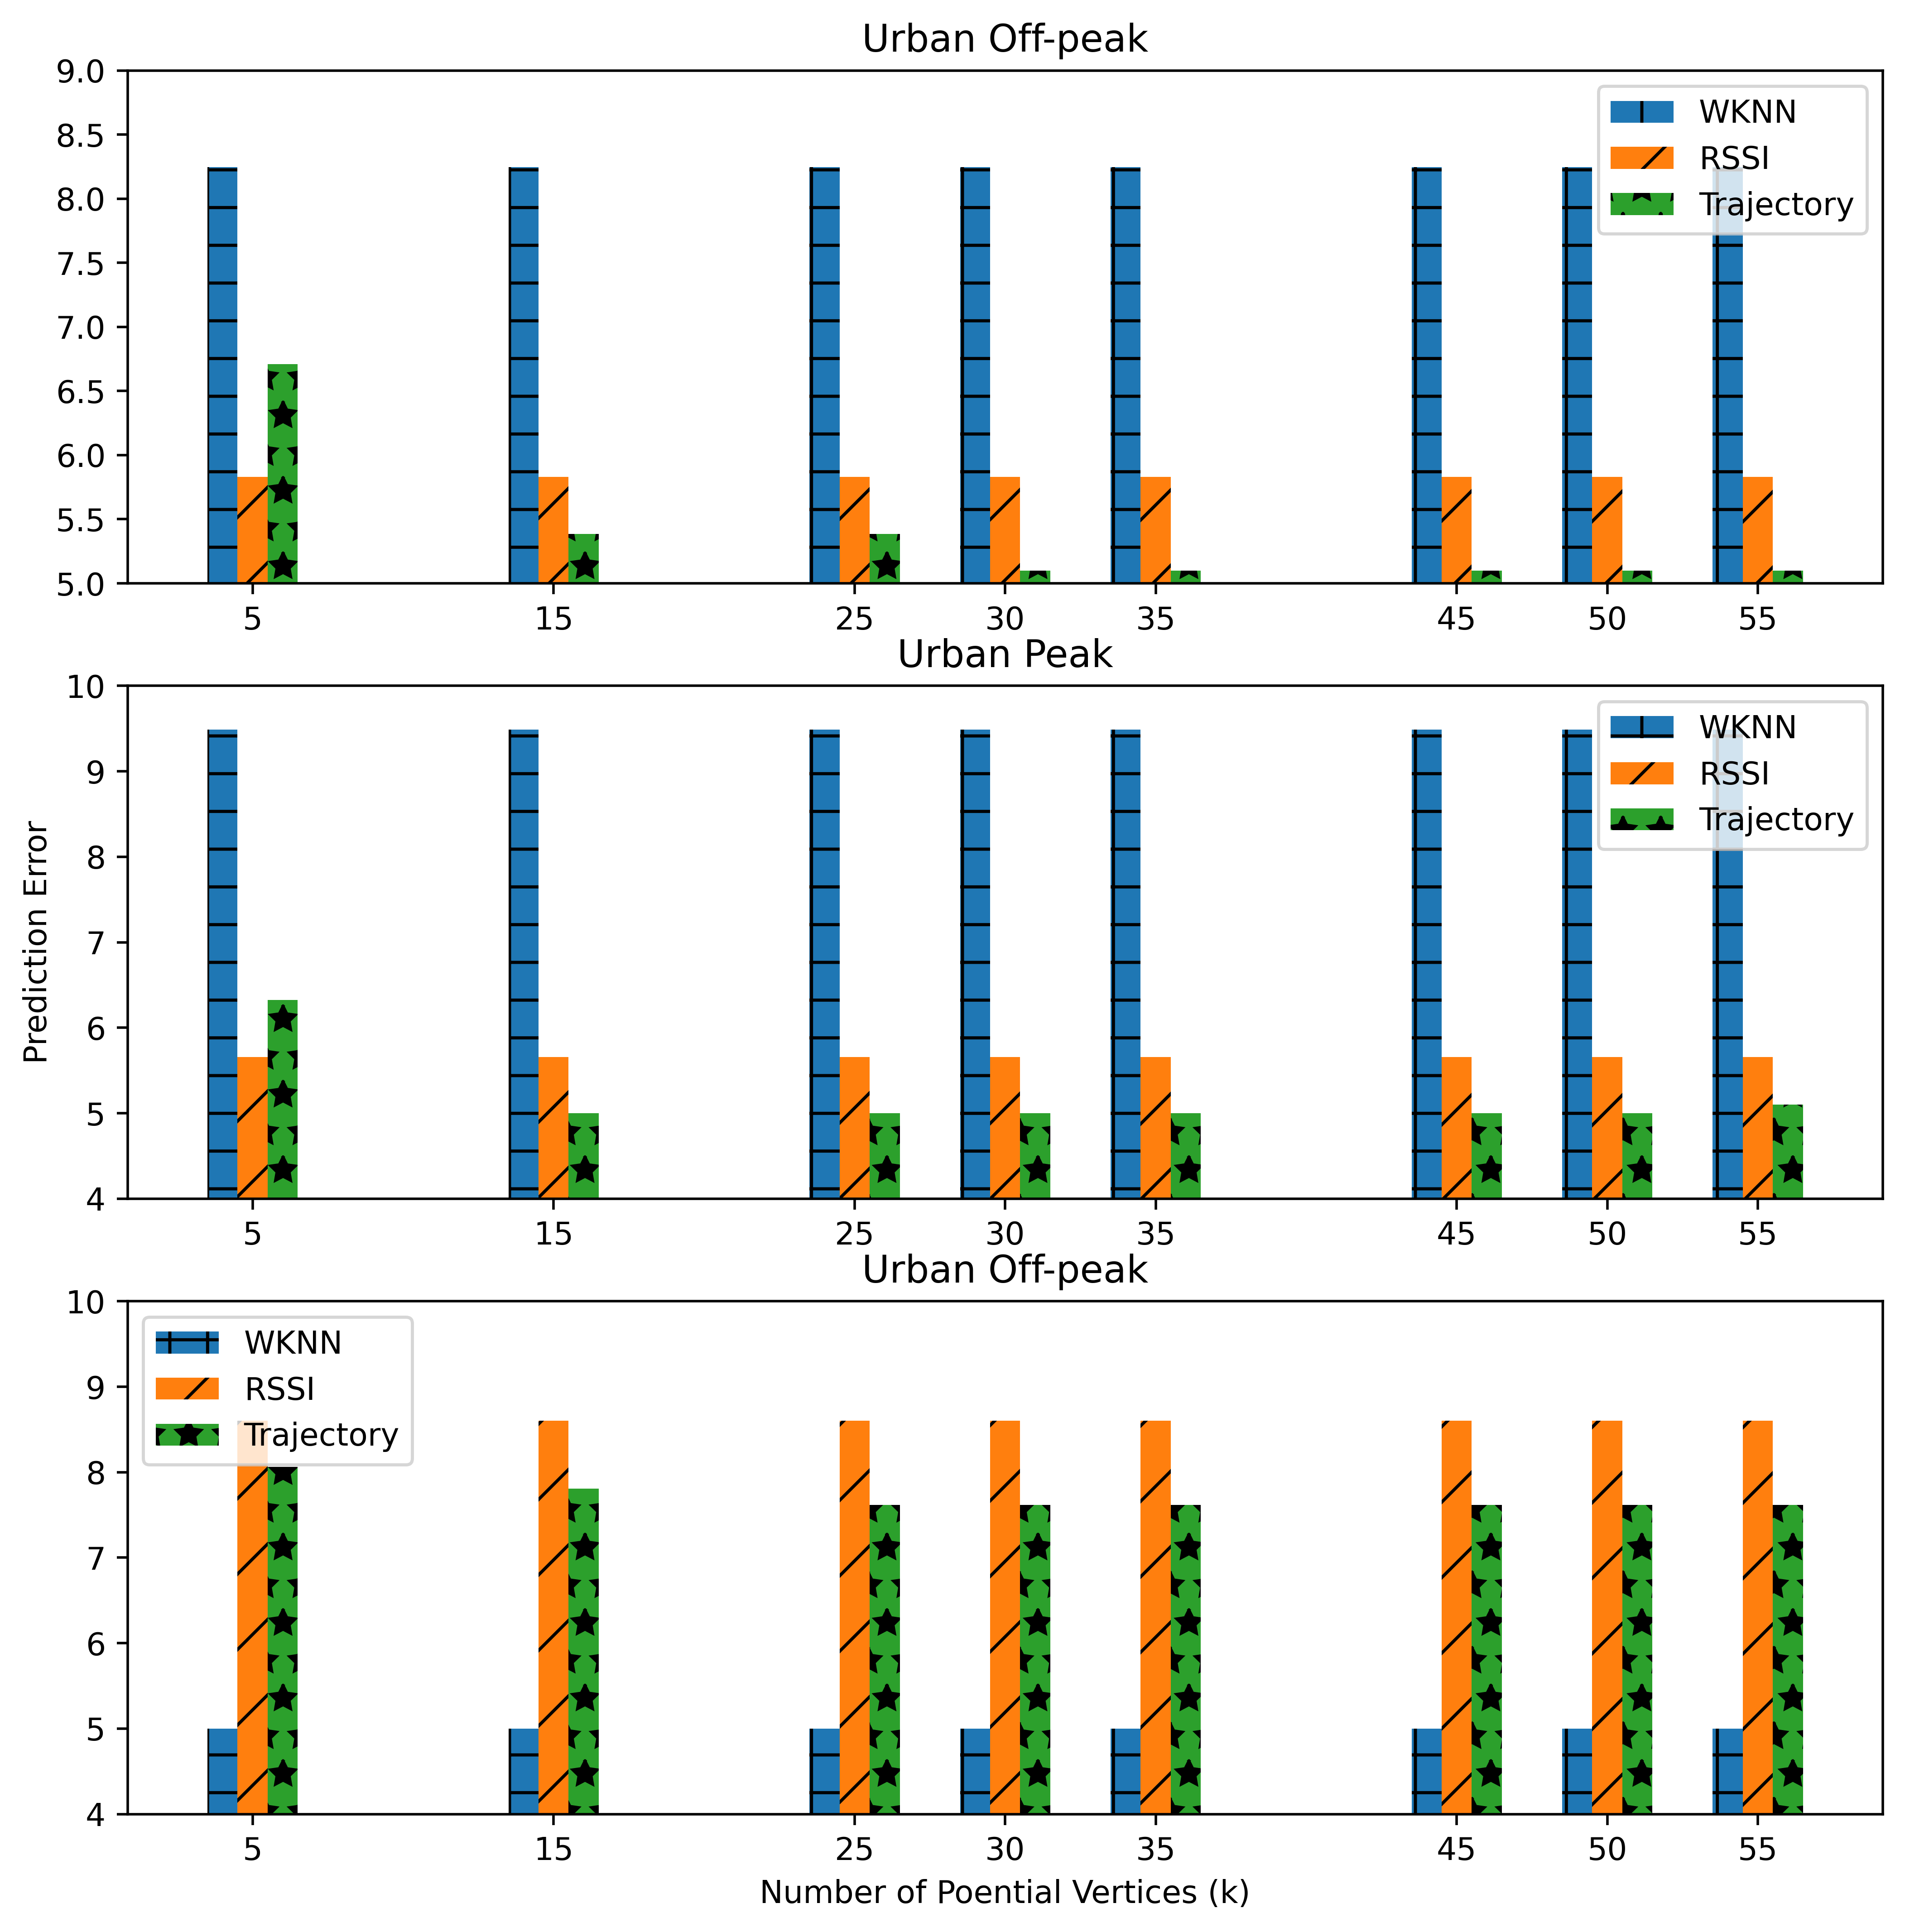

In [45]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
fig.set_dpi(500)
n0 = uodf.query('n_step==0 and dx==100 and time_gap==3')[['top_k','median']].set_index('top_k').to_dict(orient='dict')['median']
n2 = uodf.query('n_step==2 and dx==100 and time_gap==3')[['top_k','median']].set_index('top_k').to_dict(orient='dict')['median']
n2 =  [[k,v] for k,v in n2.items() if k in n0]
n0 =  [[k,v] for k,v in n0.items() if k in n0]
wknn =  [uodf_wknn.query('dx==100')['median'].values[0]] * len(n2)
n0 = np.array(sorted(n0, key=lambda x:x[0]))
n2 = np.array(sorted(n2, key=lambda x:x[0]))
# xtics = list([str(i) for i in n0[1:,0]])
ax[0].set_ylim([5,9])
ax[0].bar( n0[:,0]-1, wknn  ,color='tab:blue', label='WKNN', width=1, hatch=['+'])
ax[0].bar( n0[:,0], n0[:,1]  ,color='tab:orange', label='RSSI', width=1, hatch=['/'])
ax[0].bar( n0[:,0]+1, n2[:,1]  ,color='tab:green', label='Trajectory', width=1, hatch=['*'])
ax[0].legend()
ax[0].set_xticks([5, 15, 25, 30, 35,45,50,55])
ax[0].set_title('Urban Off-peak')

n0 = updf.query('n_step==0 and dx==100 and time_gap==3')[['top_k','median']].set_index('top_k').to_dict(orient='dict')['median']
n2 = updf.query('n_step==2 and dx==100 and time_gap==3')[['top_k','median']].set_index('top_k').to_dict(orient='dict')['median']
n2 =  [[k,v] for k,v in n2.items() if k in n0]
n0 =  [[k,v] for k,v in n0.items() if k in n0]
wknn =  [updf_wknn.query('dx==100')['median'].values[0]] * len(n2)
n0 = np.array(sorted(n0, key=lambda x:x[0]))
n2 = np.array(sorted(n2, key=lambda x:x[0]))
# xtics = list([str(i) for i in n0[1:,0]])
ax[1].set_ylim([4,10])
ax[1].bar( n0[:,0]-1, wknn  ,color='tab:blue', label='WKNN', width=1, hatch=['+'])
ax[1].bar( n0[:,0], n0[:,1]  ,color='tab:orange', label='RSSI', width=1, hatch=['/'])
ax[1].bar( n0[:,0]+1, n2[:,1]  ,color='tab:green', label='Trajectory', width=1, hatch=['*'])
ax[1].legend()
ax[1].set_xticks([5, 15, 25, 30, 35,45,50,55])
ax[1].set_title('Urban Peak')

n0 = rdf.query('n_step==0 and dx==100 and time_gap==3')[['top_k','median']].set_index('top_k').to_dict(orient='dict')['median']
n2 = rdf.query('n_step==2 and dx==100 and time_gap==3')[['top_k','median']].set_index('top_k').to_dict(orient='dict')['median']
n2 =  [[k,v] for k,v in n2.items() if k in n0]
n0 =  [[k,v] for k,v in n0.items() if k in n0]
wknn =  [rdf_wknn.query('dx==100')['median'].values[0]] * len(n2)
n0 = np.array(sorted(n0, key=lambda x:x[0]))
n2 = np.array(sorted(n2, key=lambda x:x[0]))
# xtics = list([str(i) for i in n0[1:,0]])
ax[2].set_ylim([4,10])
ax[2].bar( n0[:,0]-1, wknn  ,color='tab:blue', label='WKNN', width=1, hatch=['+'])
ax[2].bar( n0[:,0], n0[:,1]  ,color='tab:orange', label='RSSI', width=1, hatch=['/'])
ax[2].bar( n0[:,0]+1, n2[:,1]  ,color='tab:green', label='Trajectory', width=1, hatch=['*'])
ax[2].legend()
ax[2].set_xticks([5, 15, 25, 30, 35,45,50,55])
ax[2].set_title('Urban Off-peak')

ax[1].set_ylabel('Prediction Error')
ax[2].set_xlabel('Number of Poential Vertices (k)')
plt.savefig('kgrids-accu.pdf',dpi=1000)

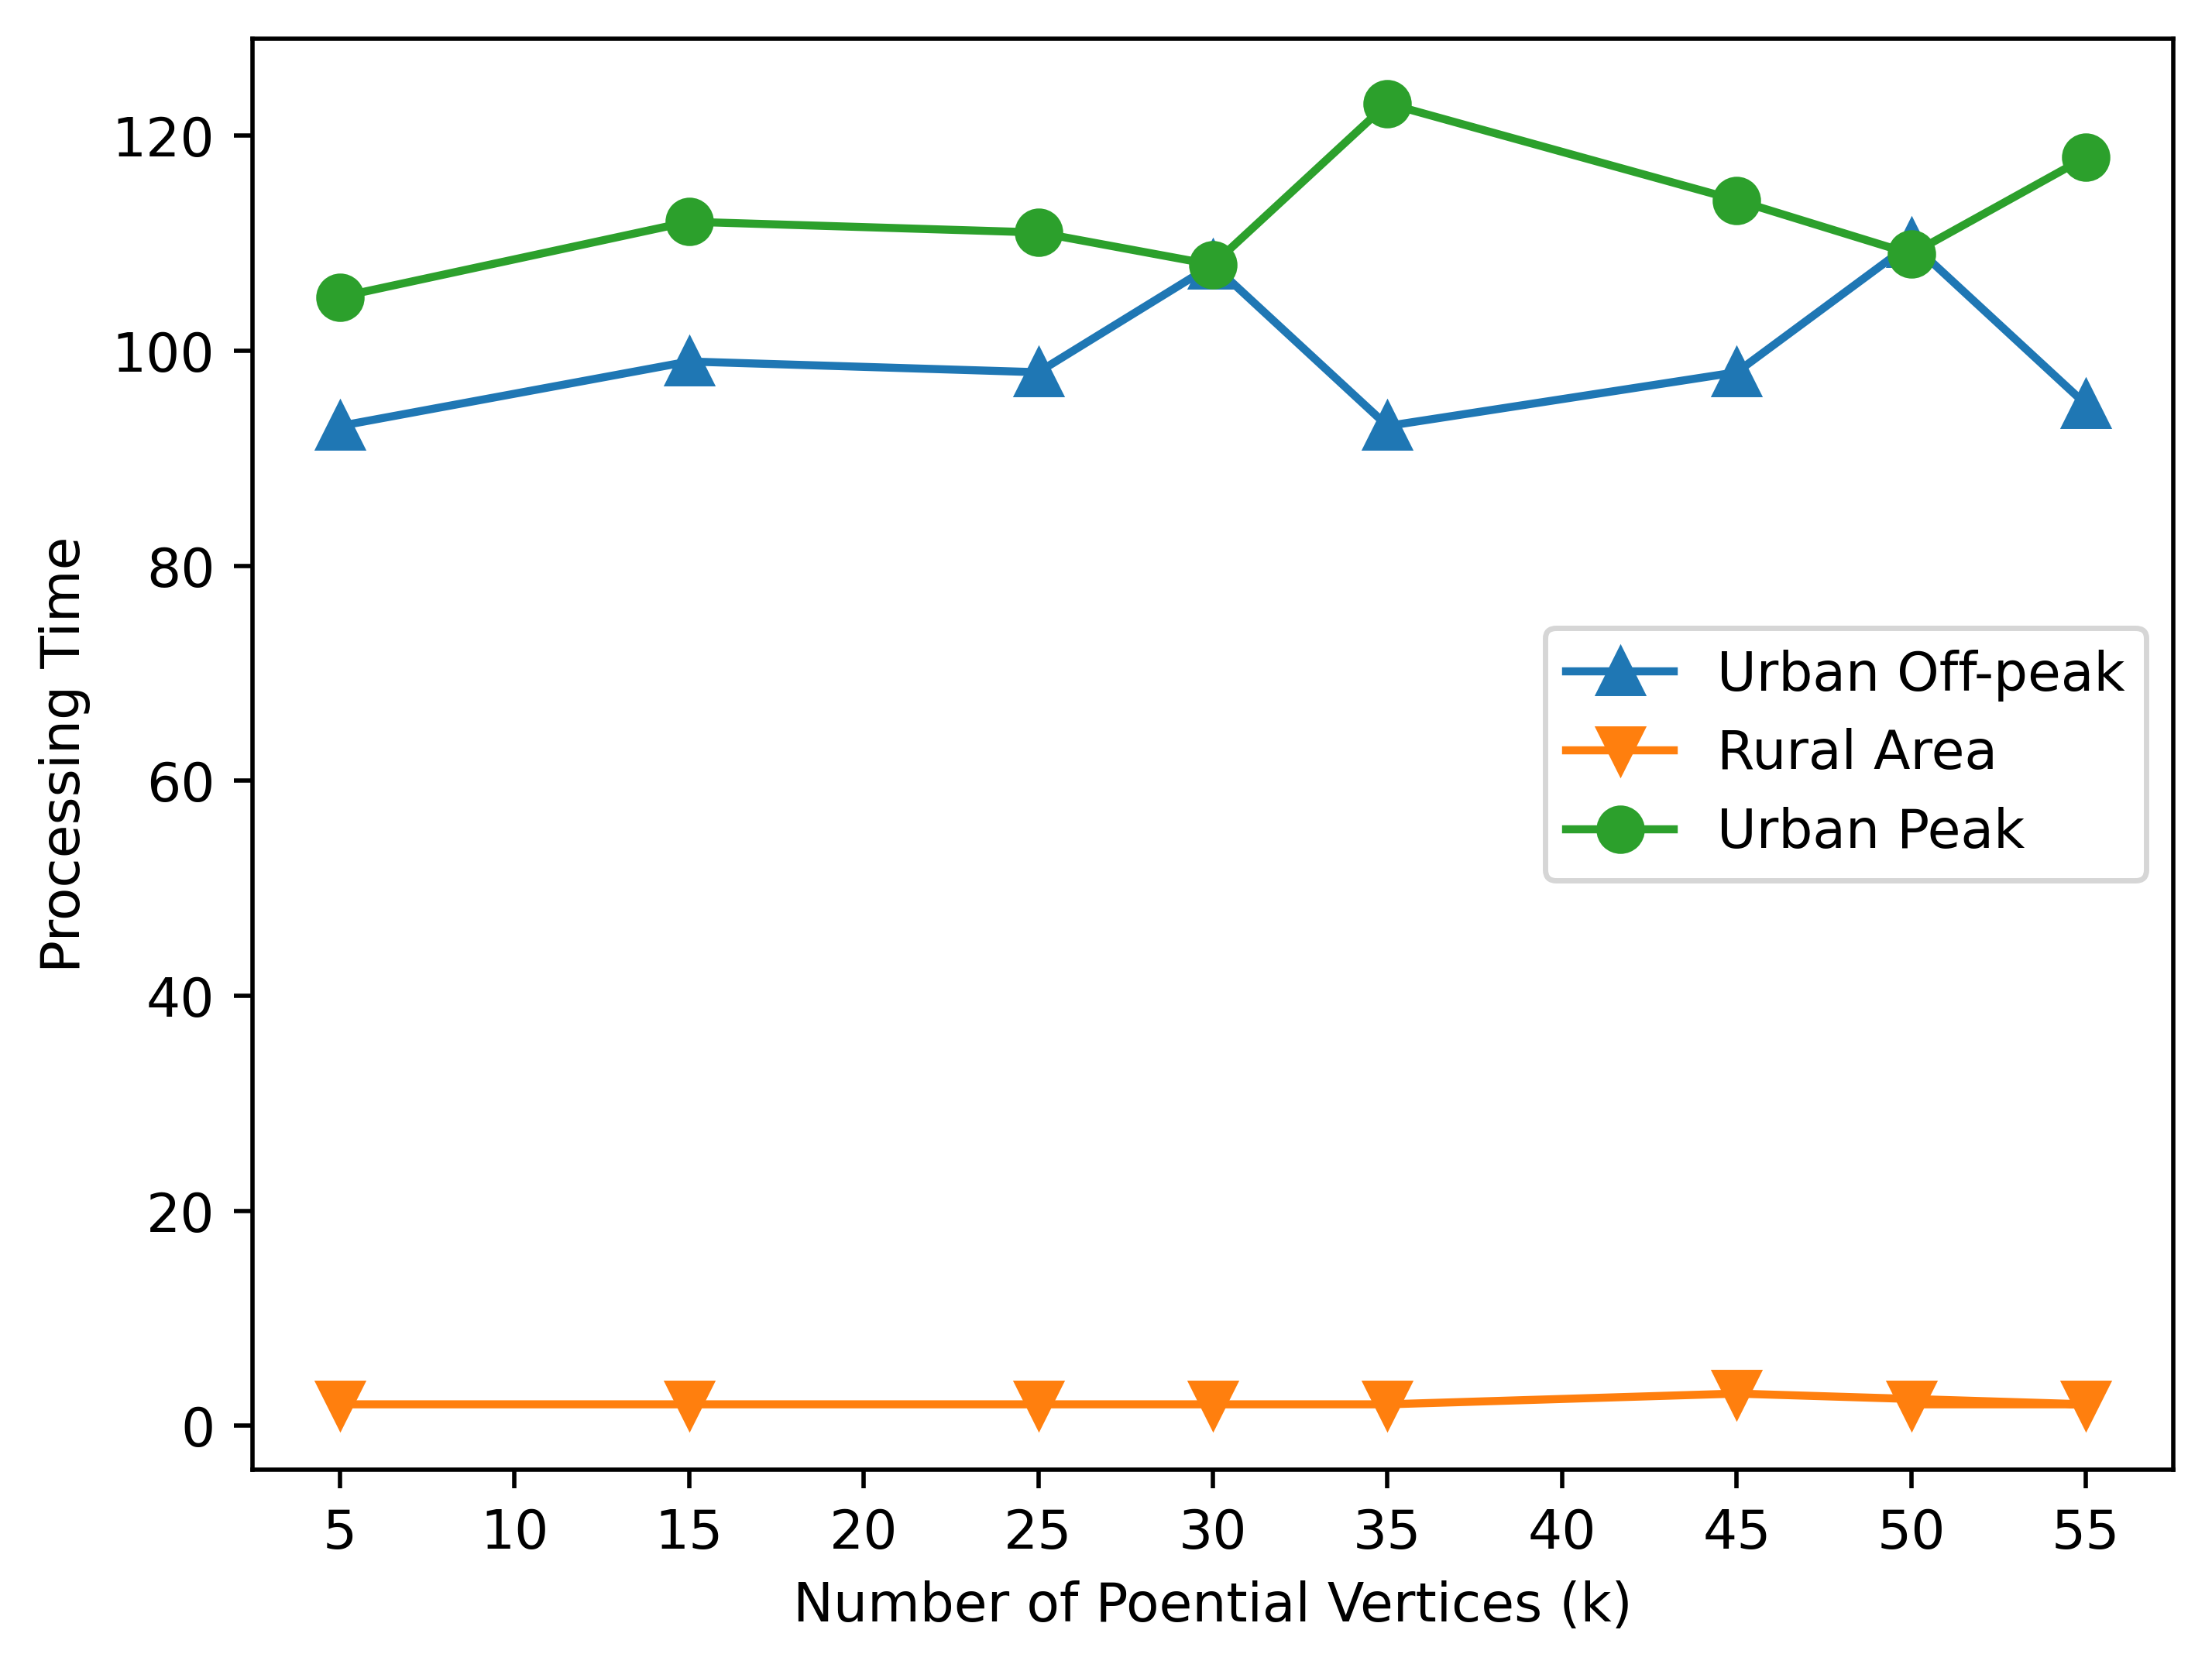

In [46]:
fig, ax = plt.subplots(1,1)
fig.set_dpi(500)
ax.plot(uodf.query('n_step==2 and dx==100 and time_gap==3')['top_k'],uodf.query('n_step==2 and dx==100 and time_gap==3')['t0'], marker='^', markersize=8, label='Urban Off-peak')
ax.plot(rdf.query('n_step==2 and dx==100 and time_gap==3')['top_k'],rdf.query('n_step==2 and dx==100 and time_gap==3')['t0'], marker='v', markersize=8, label='Rural Area')
ax.plot(updf.query('n_step==2 and dx==100 and time_gap==3')['top_k'],updf.query('n_step==2 and dx==100 and time_gap==3')['t0'], marker='o', markersize=8, label='Urban Peak')
ax.set_ylabel('Processing Time')
ax.set_xlabel('Number of Poential Vertices (k)')
ax.set_xticks(range(5,56,5))
ax.legend()
plt.savefig('kgrids-time.pdf',dpi=500)

In [194]:
 uodf.query('n_step==0 and dx==100 and time_gap==3')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']

{3: 5.830951895}

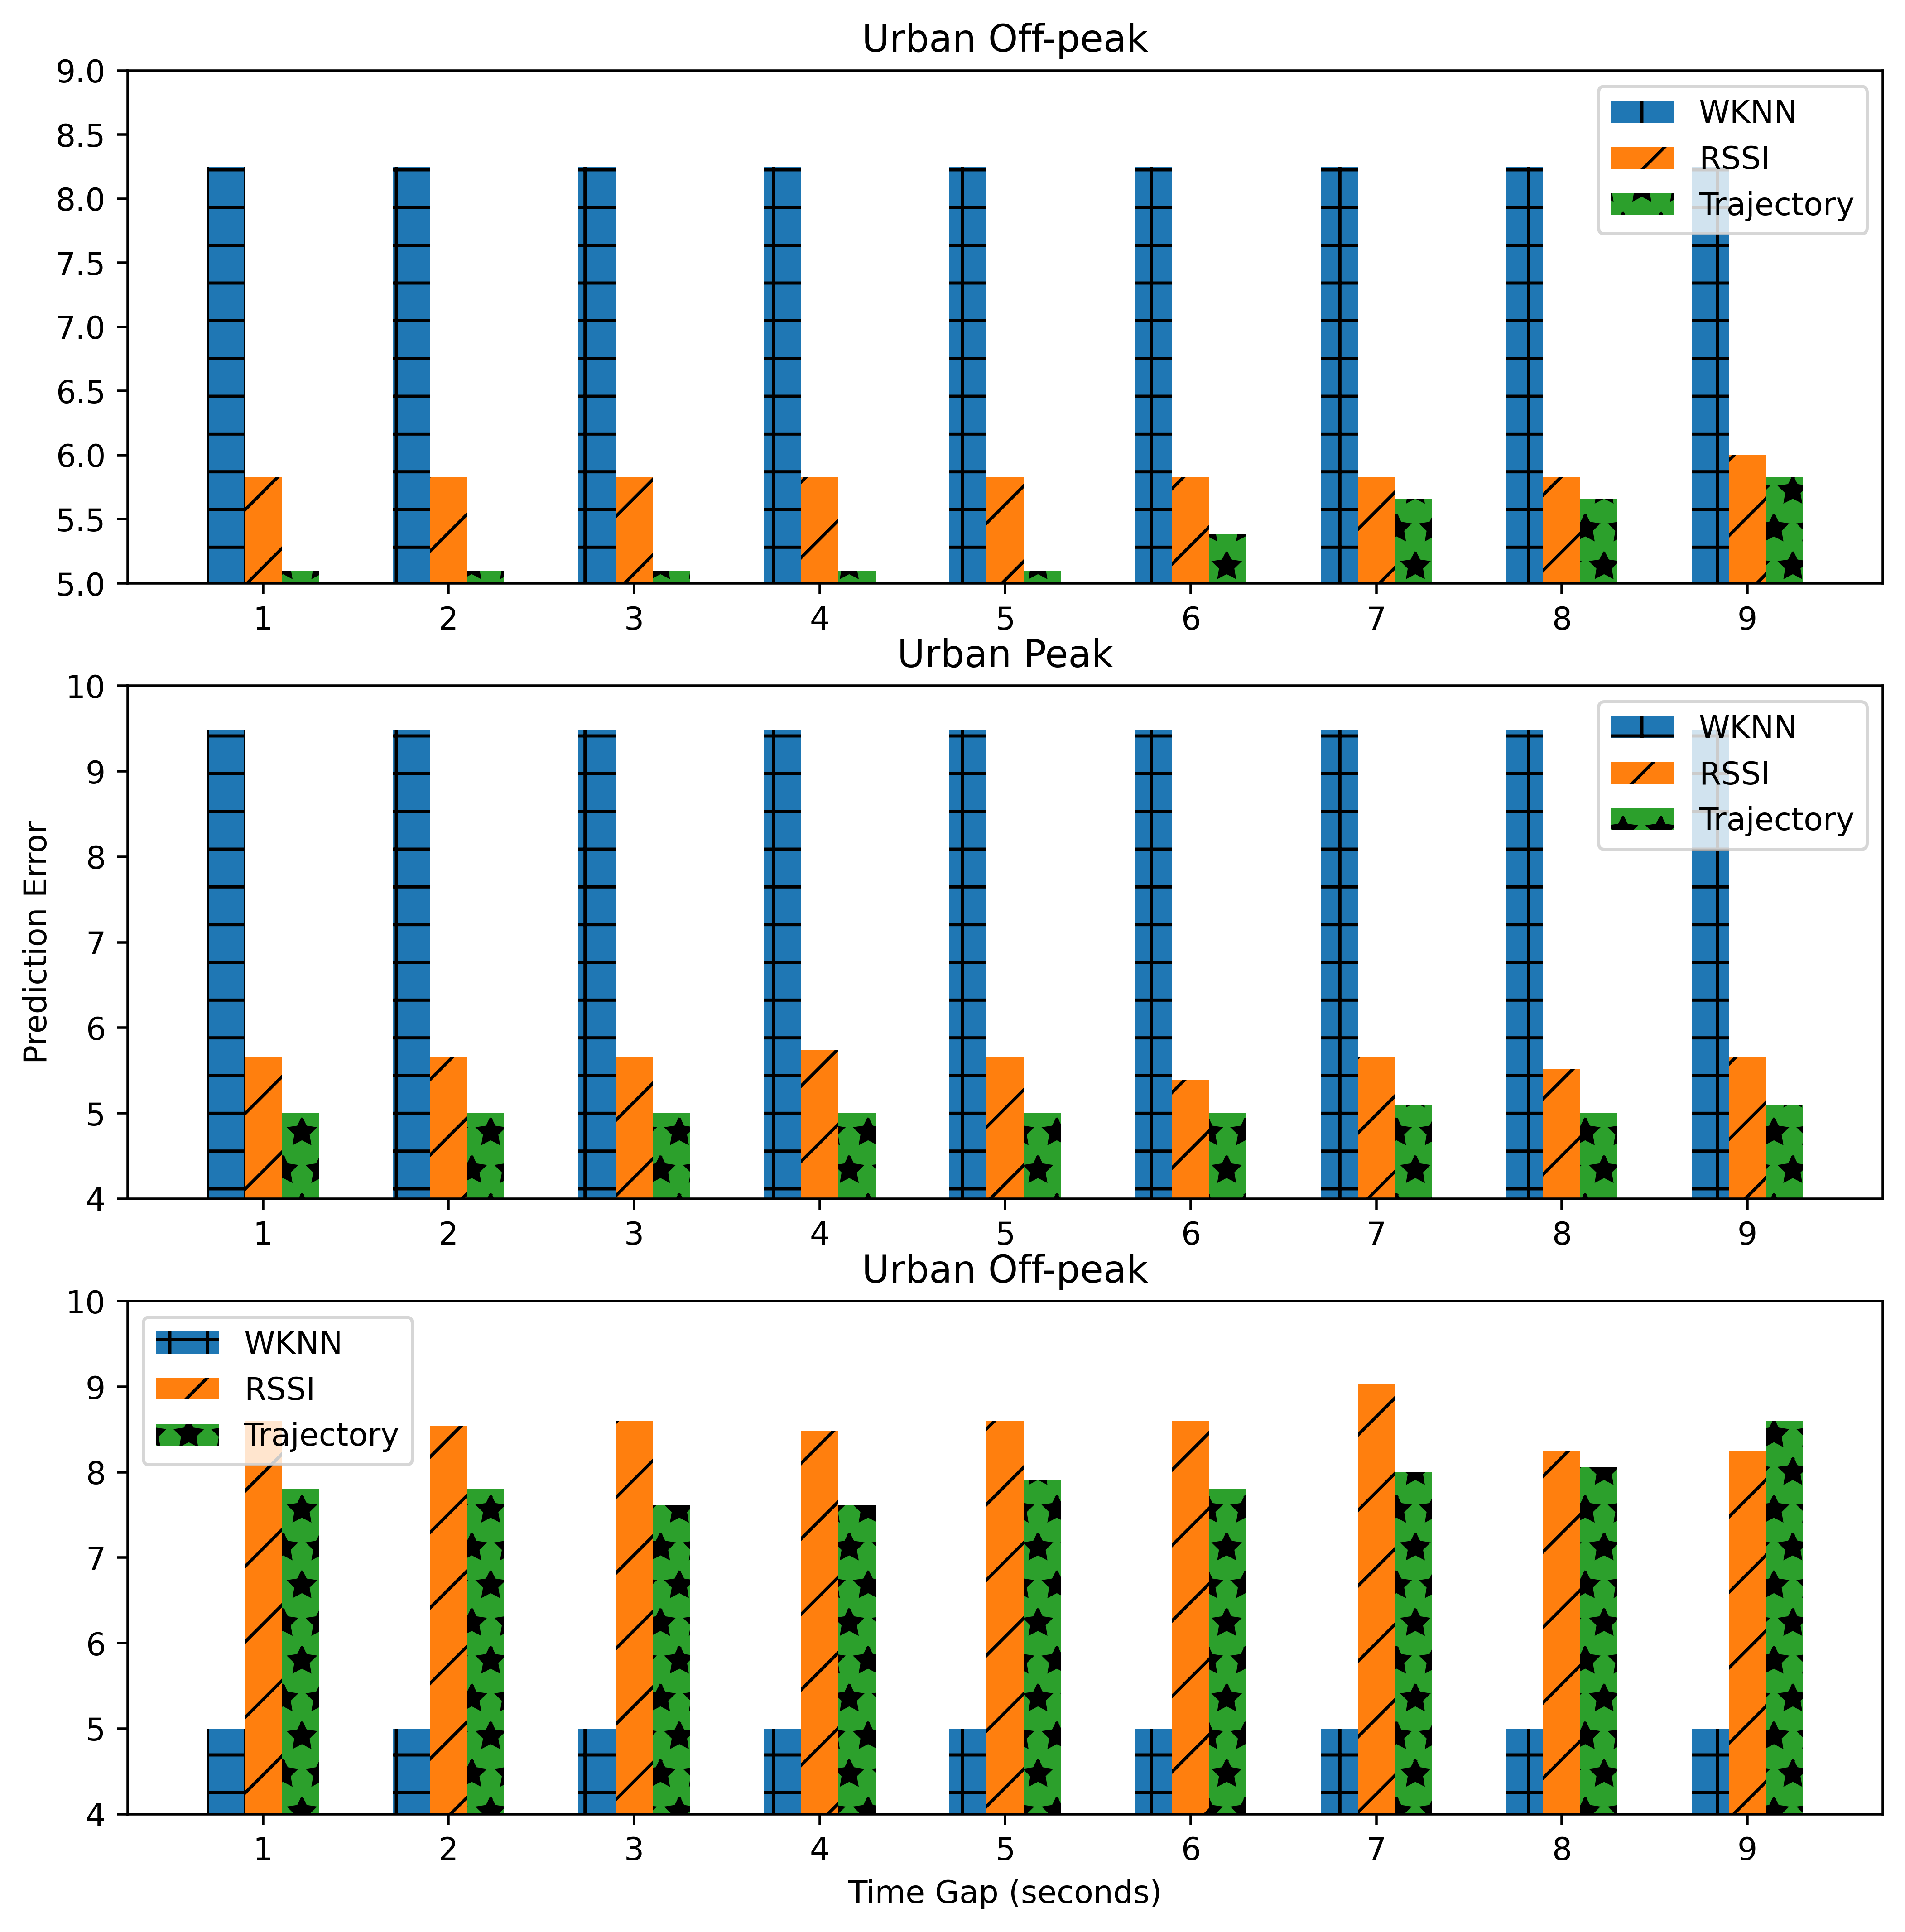

In [47]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
fig.set_dpi(500)
n0 = uodf.query('n_step==0 and dx==100 and top_k==30')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 = uodf.query('n_step==2 and dx==100 and top_k==30')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 =  [[k,v] for k,v in n2.items() if k in n0]
n0 =  [[k,v] for k,v in n0.items() if k in n0]
wknn =  [uodf_wknn.query('dx==100')['median'].values[0]] * len(n2)
n0 = np.array(sorted(n0, key=lambda x:x[0]))
n2 = np.array(sorted(n2, key=lambda x:x[0]))
# xtics = list([str(i) for i in n0[1:,0]])
ax[0].set_ylim([5,9])
ax[0].bar( n0[:,0]-.2, wknn  ,color='tab:blue', label='WKNN', width=.2, hatch=['+'])
ax[0].bar( n0[:,0], n0[:,1]  ,color='tab:orange', label='RSSI', width=.2, hatch=['/'])
ax[0].bar( n0[:,0]+.2, n2[:,1]  ,color='tab:green', label='Trajectory', width=.2, hatch=['*'])
ax[0].legend()
ax[0].set_xticks(range(1,10))
ax[0].set_title('Urban Off-peak')

n0 = updf.query('n_step==0 and dx==100 and top_k==30')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 = updf.query('n_step==2 and dx==100 and top_k==30')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 =  [[k,v] for k,v in n2.items() if k in n0]
n0 =  [[k,v] for k,v in n0.items() if k in n0]
wknn =  [updf_wknn.query('dx==100')['median'].values[0]] * len(n2)
n0 = np.array(sorted(n0, key=lambda x:x[0]))
n2 = np.array(sorted(n2, key=lambda x:x[0]))

ax[1].set_ylim([4,10])
ax[1].bar( n0[:,0]-.2, wknn  ,color='tab:blue', label='WKNN', width=.2, hatch=['+'])
ax[1].bar( n0[:,0], n0[:,1]  ,color='tab:orange', label='RSSI', width=.2, hatch=['/'])
ax[1].bar( n0[:,0]+.2, n2[:,1]  ,color='tab:green', label='Trajectory', width=.2, hatch=['*'])
ax[1].legend()
ax[1].set_xticks(range(1,10))
ax[1].set_title('Urban Peak')

n0 = rdf.query('n_step==0 and dx==100 and top_k==30')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 = rdf.query('n_step==2 and dx==100 and top_k==30')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 =  [[k,v] for k,v in n2.items() if k in n0]
n0 =  [[k,v] for k,v in n0.items() if k in n0]
wknn =  [rdf_wknn.query('dx==100')['median'].values[0]] * len(n2)
n0 = np.array(sorted(n0, key=lambda x:x[0]))
n2 = np.array(sorted(n2, key=lambda x:x[0]))
# xtics = list([str(i) for i in n0[1:,0]])
ax[2].set_ylim([4,10])
ax[2].bar( n0[:,0]-.2, wknn  ,color='tab:blue', label='WKNN', width=.2, hatch=['+'])
ax[2].bar( n0[:,0], n0[:,1]  ,color='tab:orange', label='RSSI', width=.2, hatch=['/'])
ax[2].bar( n0[:,0]+.2, n2[:,1]  ,color='tab:green', label='Trajectory', width=.2, hatch=['*'])
ax[2].set_xticks(range(1,10))
ax[2].legend()
ax[2].set_title('Urban Off-peak')

ax[1].set_ylabel('Prediction Error')
ax[2].set_xlabel('Time Gap (seconds)')
plt.savefig('timegap-accu.pdf',dpi=1000)

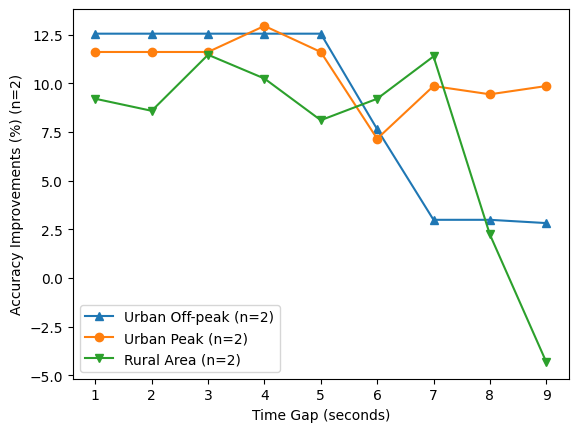

In [10]:
ax = plt.subplot(1,1,1)
n0 = uodf.query('top_k==30 and dx==100 and n_step==0')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 = uodf.query('top_k==30 and dx==100 and n_step==2')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 =  [[k,-(n2[k]-v)/v*100] for k,v in n0.items() if k in n2]
n2 = np.array(sorted(n2, key=lambda x:x[0]))
ax.plot(n2[:,0], n2[:,1], marker='^', label='Urban Off-peak (n=2)')

n0 = updf.query('top_k==30 and dx==100 and n_step==0')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 = updf.query('top_k==30 and dx==100 and n_step==2')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 =  [[k,-(n2[k]-v)/v*100] for k,v in n0.items() if k in n2]
up = np.array(sorted(n2, key=lambda x:x[0]))
ax.plot(up[:,0], up[:,1], marker='o', label='Urban Peak (n=2)')


n0 = rdf.query('top_k==30 and dx==100 and n_step==0')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 = rdf.query('top_k==30 and dx==100 and n_step==2')[['time_gap','median']].set_index('time_gap').to_dict(orient='dict')['median']
n2 =  [[k,-(n2[k]-v)/v*100] for k,v in n0.items() if k in n2]
r = np.array(sorted(n2, key=lambda x:x[0]))
ax.plot(r[:,0], r[:,1], marker='v', label='Rural Area (n=2)')
ax.set_ylabel('Accuracy Improvements (%) (n=2)')
ax.set_xlabel('Time Gap (seconds)')
ax.legend()
plt.savefig('timegap-accu.pdf',dpi=1000)

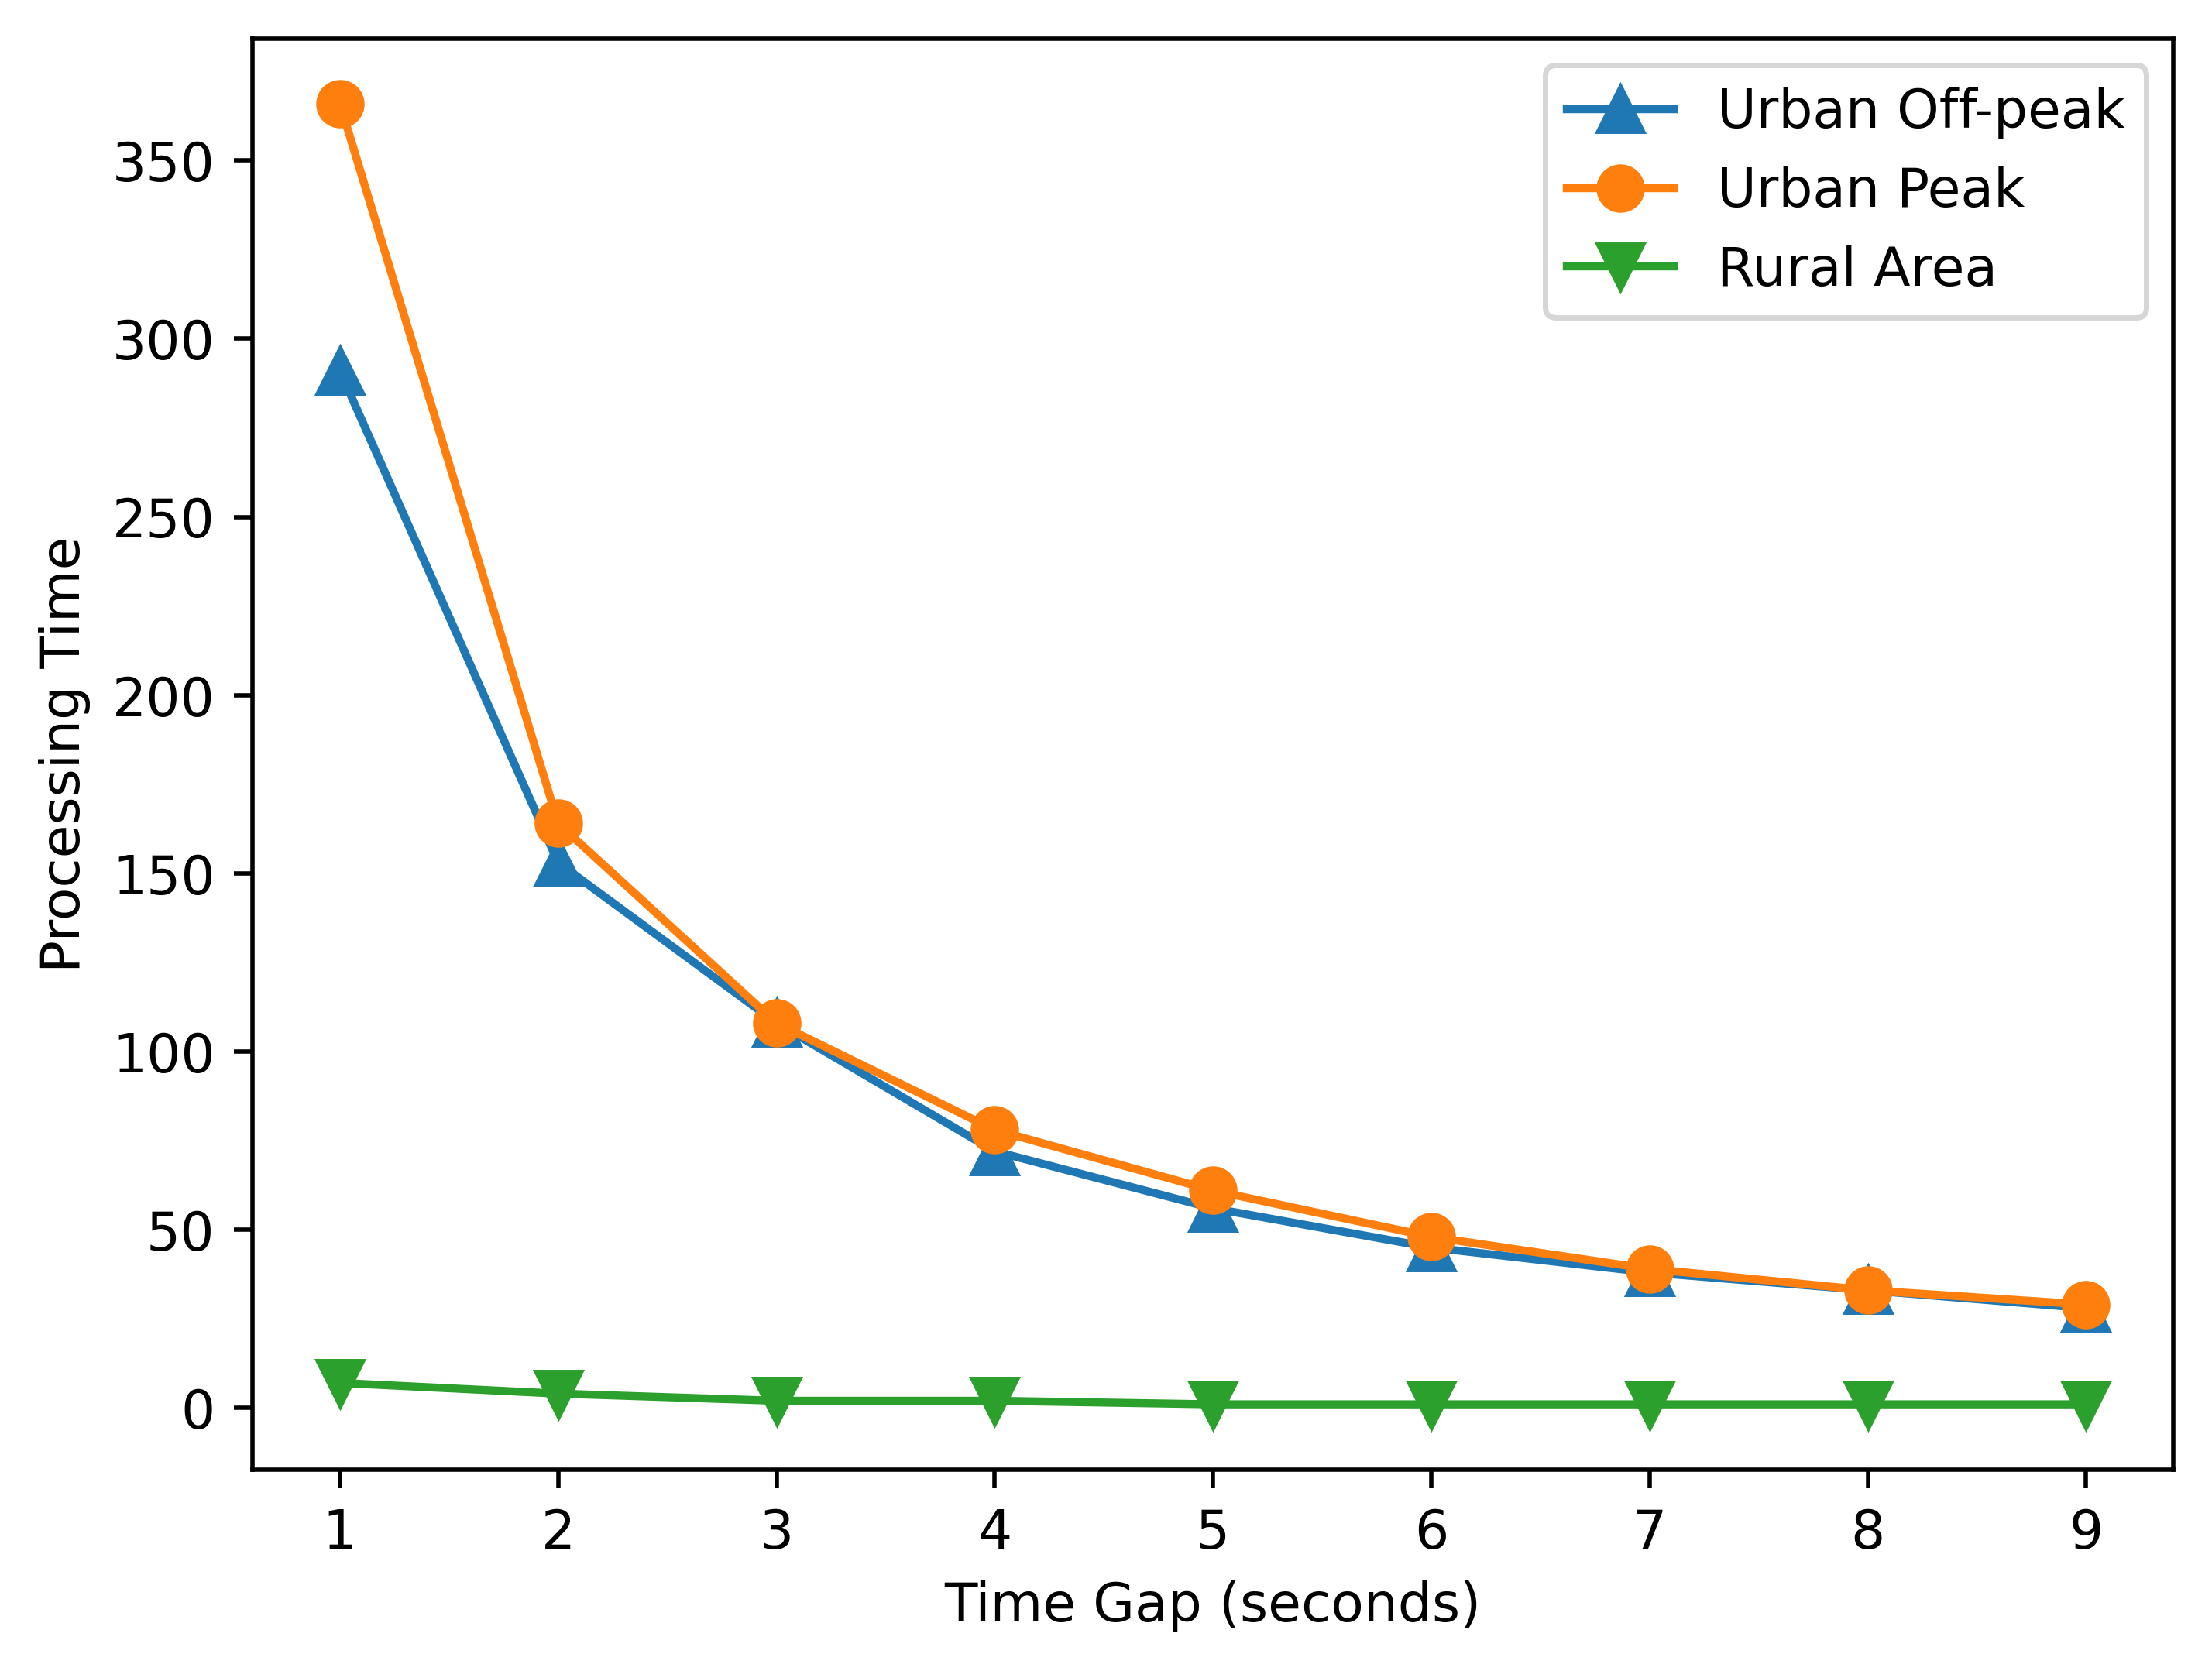

In [49]:
 fig, ax = plt.subplots(1,1)
fig.set_dpi(500)
uo = np.array(sorted(uodf.query('top_k==30 and dx==100 and n_step==2')[['time_gap', 't0']].values, key=lambda x:x[0]))
ax.plot(uo[:,0], uo[:,1], marker='^',markersize=8, label='Urban Off-peak')
up = np.array(sorted(updf.query('top_k==30 and dx==100 and n_step==2')[['time_gap', 't0']].values, key=lambda x:x[0]))
ax.plot(up[:,0], up[:,1], marker='o',markersize=8, label='Urban Peak')
r = np.array(sorted(rdf.query('top_k==30 and dx==100 and n_step==2')[['time_gap', 't0']].values, key=lambda x:x[0]))
ax.plot(r[:,0], r[:,1], marker='v', markersize=8,label='Rural Area')
ax.set_ylabel('Processing Time')
ax.set_xlabel('Time Gap (seconds)')
ax.legend()
plt.savefig('timegap-time.pdf',dpi=500)

In [50]:
df = pd.read_csv('uelocation.csv', header=0)

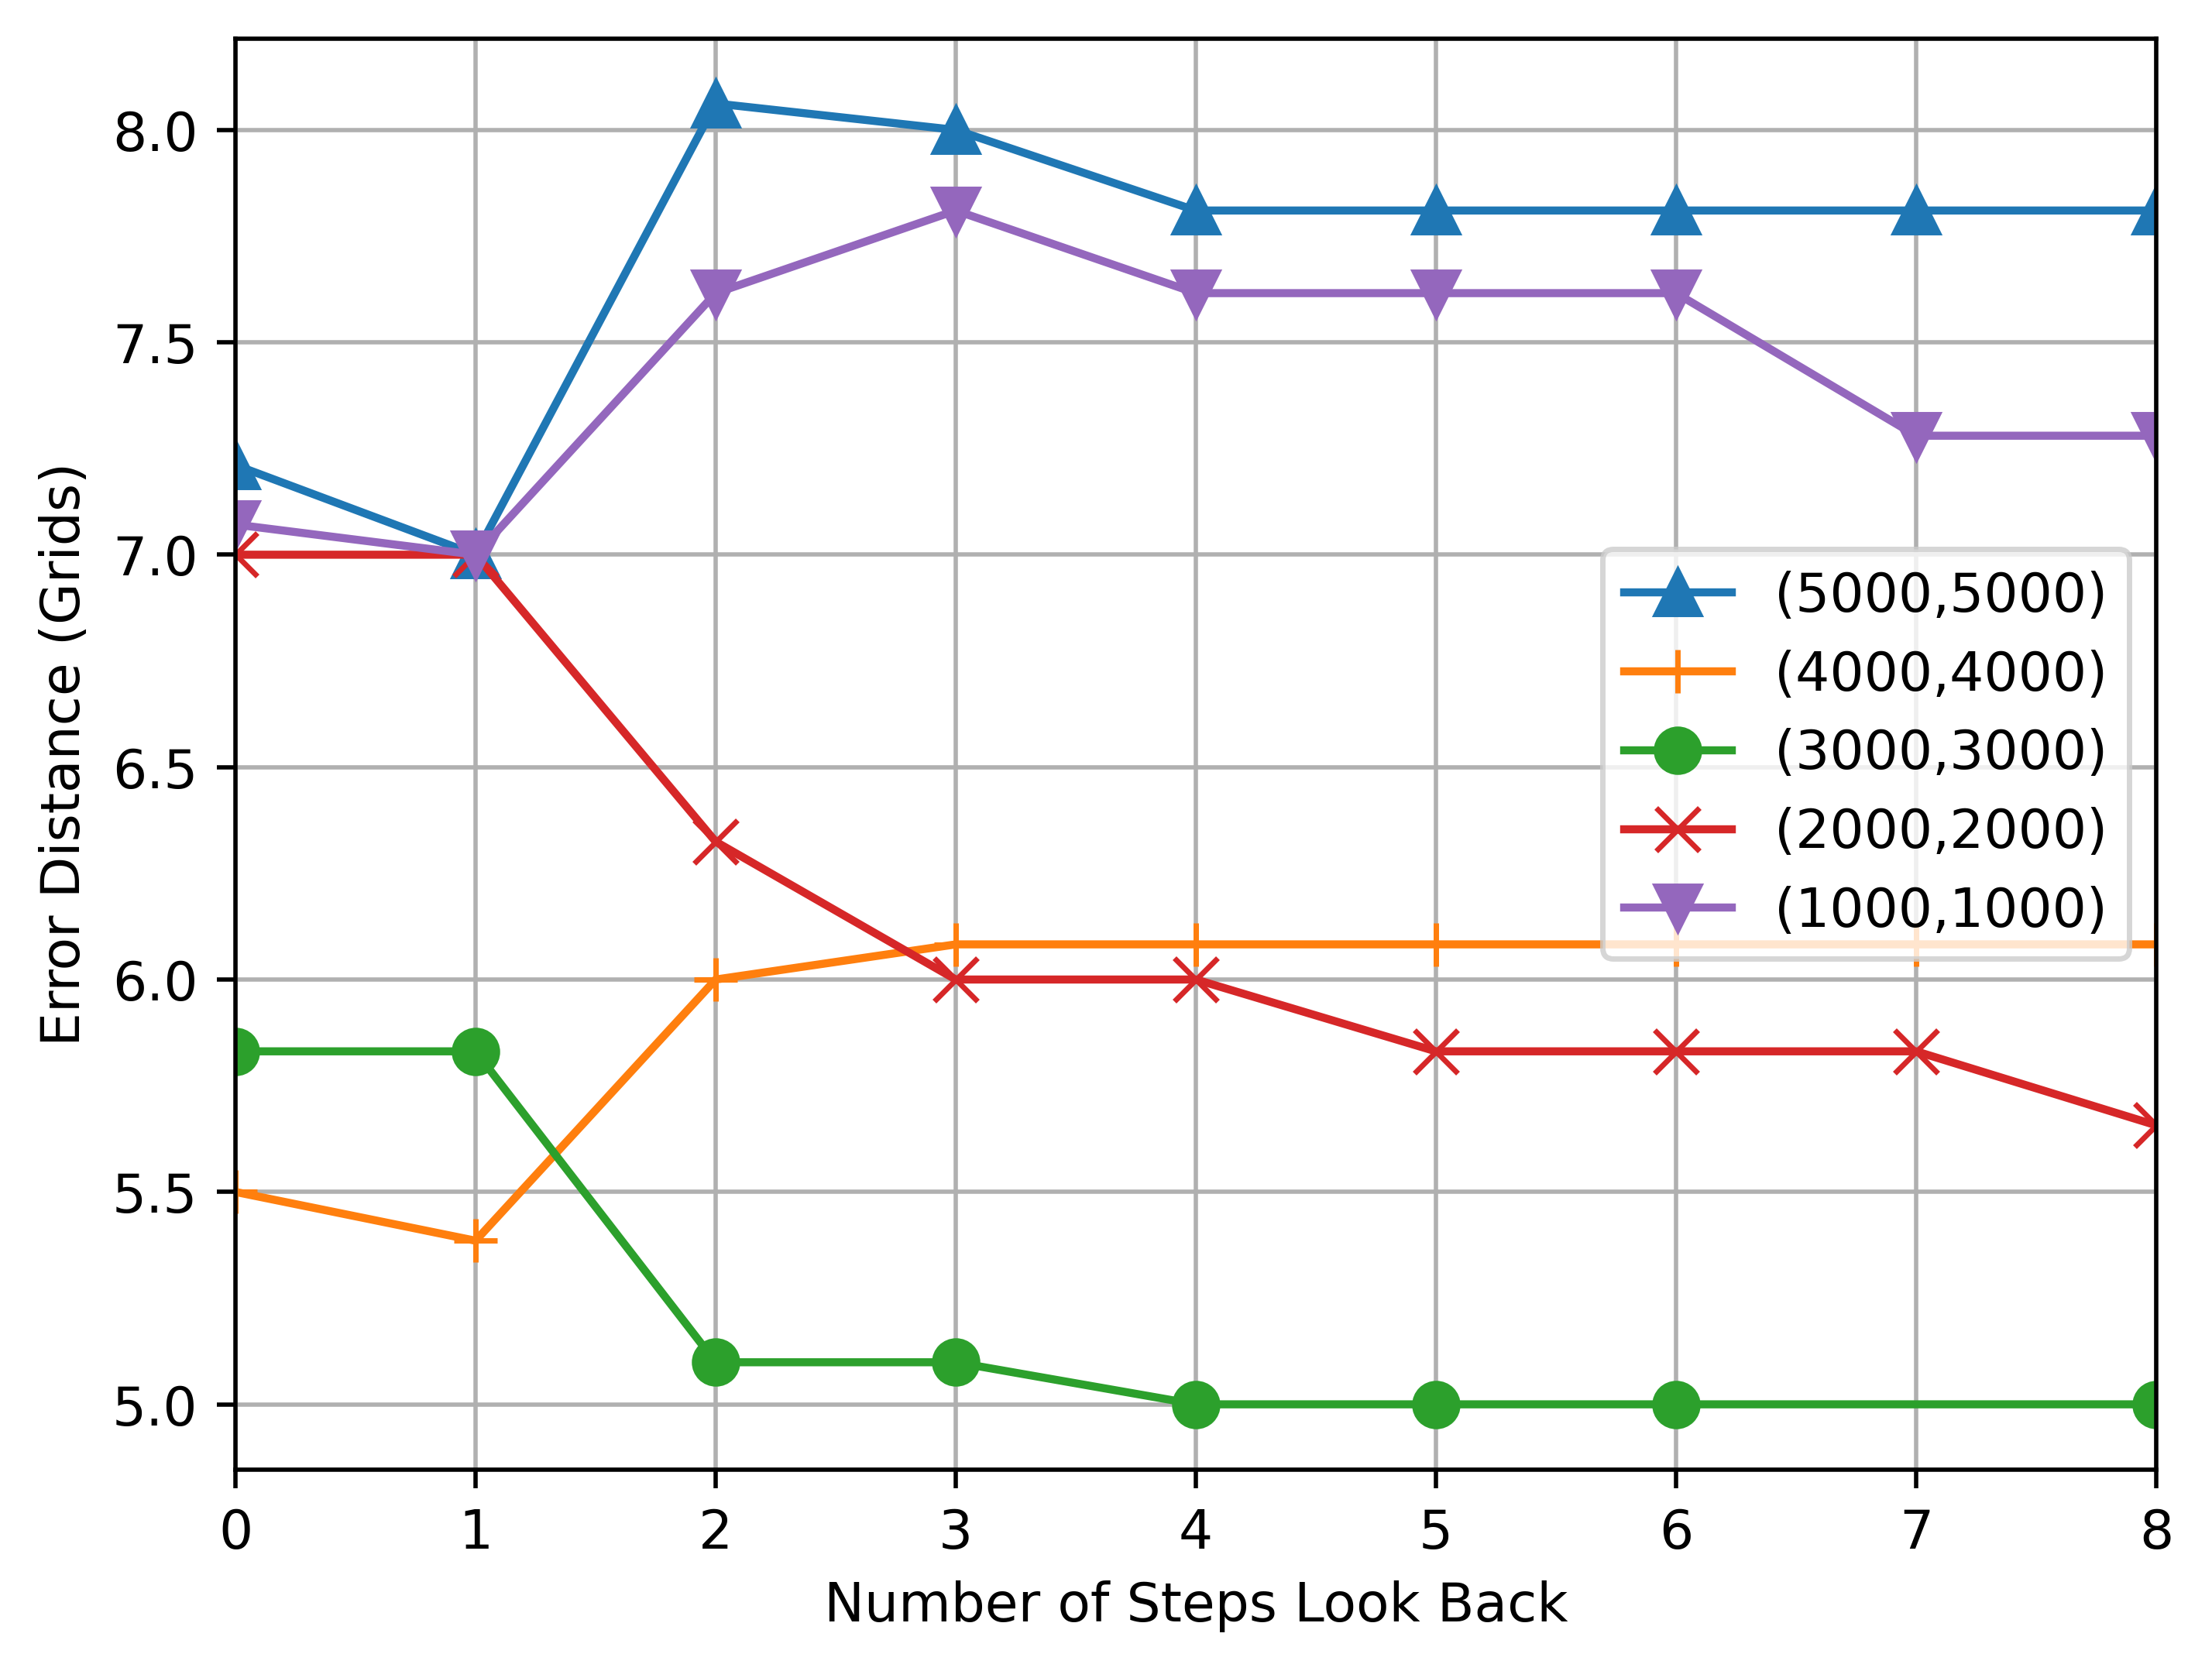

In [51]:
fig, ax = plt.subplots(1,1)
fig.set_dpi(500)
uo = np.array(sorted(df.query('position==5000')[['n_step', 'median']].values, key=lambda x:x[0]))
ax.plot(uo[:,0], uo[:,1],  marker='^',markersize=8, label='(5000,5000)')
uo = np.array(sorted(df.query('position==4000')[['n_step', 'median']].values, key=lambda x:x[0]))
ax.plot(uo[:,0], uo[:,1],  marker='+',markersize=8, label='(4000,4000)')
uo = np.array(sorted(df.query('position==3000')[['n_step', 'median']].values, key=lambda x:x[0]))
ax.plot(uo[:,0], uo[:,1],  marker='o',markersize=8, label='(3000,3000)')
uo = np.array(sorted(df.query('position==2000')[['n_step', 'median']].values, key=lambda x:x[0]))
ax.plot(uo[:,0], uo[:,1],  marker='x',markersize=8, label='(2000,2000)')
uo = np.array(sorted(df.query('position==1000')[['n_step', 'median']].values, key=lambda x:x[0]))
ax.plot(uo[:,0], uo[:,1],  marker='v',markersize=8, label='(1000,1000)')
ax.legend()
ax.set_xlabel('Number of Steps Look Back')
ax.set_ylabel('Error Distance (Grids)')
ax.set_xlim([0,8])
ax.grid()
plt.savefig('gnbloc.pdf',dpi=500)